In [18]:
"""
Created on 26.01.2025

"""

#Imported libraries:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import special

### **Task 1**

### **a)**

In this exercise we will find the general solution to the diffusion equation using the Fourier transform. In 1D, the diffusion equation with a constant diffusion coefficient $D$ takes the form

$\begin{equation}
\frac{\partial \Phi(x,t)}{\partial t}=D \frac{\partial^{2} \Phi(x,t)}{\partial^{2} x}, 
\tag{1}
\end{equation}$

where $\Phi(x,t)$ is the distribution of particles at a position $x$ and time $t\geq0$. Assuming that $\Phi$ is piecewise continous, this partial differential equation can be solved using the Fourier transform. We define $\mathcal{F} \left[\Phi(x,t) \right](\omega)=\hat{\Phi}(\omega,t)$ so that

$\begin{equation}
\frac{\partial \hat{\Phi}(\omega,t)}{\partial t} =
D \cdot \mathcal{F} \left[ \frac{\partial^{2} \Phi(x,t)}{\partial^{2} x}\right] (\omega) =
-D\omega^{2} \cdot \hat{\Phi}(\omega,t) 
\ \text{.}
\tag{2}
\end{equation}$

If we use the ansatz $\hat{\Phi}(ω, t) = A e^{\alpha t}$, we can rewrtie eq. (2) and obtain

$\begin{equation}
\hat{\Phi}(\omega,t)=\hat{\Phi}(\omega,0)e^{-D\omega^{2}t} \text{.}
\tag{3}
\end{equation}$

Where $A = \hat{\Phi}(\omega,0)$ is the Fourier transform of the initial condition of $\Phi$, and $\alpha = -D\omega^{2}$. We now define $\Phi(x, 0) = h(y)$, with $\hat{\Phi}(\omega,0)=\mathcal{F}\left[h(y)\right]$ where $y$ is the initial position of the particles. We see that $h(y)$ must be the initial condition for the problem, and the physical interpretation of this is that $h(y)$ describes the initial particle distribution ($t=0$). We now use inverse Fourier transform to find $\Phi(x,t)$:

$\begin{equation}
\Phi(x,t)=\frac{1}{\sqrt{2\pi}} \int\limits_{-\infty}^\infty \mathcal{F} \left[h(y)\right]e^{-D\omega^{2}t} \cdot e^{i \omega x} d\omega \text{.}
\tag{3}
\end{equation}$

Writing $\mathcal{F} \left[h(y)\right]$ explicitly, one gets


$\begin{align}
\Phi(x,t)=& \
\frac{1}{2\pi} \int\limits_{-\infty}^\infty \left[ \int\limits_{-\infty}^\infty h(y) e^{-i \omega y} dy \right]e^{-D\omega^{2}t} \cdot e^{i \omega x} d\omega \nonumber \\ =&
\frac{1}{\sqrt{2\pi}} \int\limits_{-\infty}^\infty h(y) \left [ \frac{1}{\sqrt{2\pi}} \int\limits_{-\infty}^\infty e^{-D\omega^{2} t} \cdot e^{i(x-y)\omega} d\omega \right ] dy \nonumber \\ =& 
\frac{1}{\sqrt{2\pi}} \int\limits_{-\infty}^\infty h(y) \; \mathcal{F}^{-1}\left[ e^{-D \omega^{2} t} \right] (x-y) \; dy \text{.}
\tag{4}
\end{align}$

Using 

$\begin{equation}
\mathcal{F}^{-1} \left [e^{-\frac{\omega^{2}}{4a}} \right](x)=\sqrt{2a} \cdot e^{-ax^{2}} \text{,}
\tag{5}
\end{equation}$

and setting $a=\frac{1}{4Dt}$, we finally arrive at

$\begin{equation}
\Phi(x,t)=\frac{1}{\sqrt{4\pi Dt}} \int\limits_{-\infty}^\infty h(y) e^{-\frac{(x-y)^{2}}{4Dt}} dy \text{.}
\tag{6}
\end{equation}$



### **b)**

A particle that can only move in one dimension has an initial position $x_0$ in a potential $V$. The particle then moves either one step to the left, one step to the right, or remains still so that its new position is $x \in \{x_0-1,x_0,x_0+1\}$. Let the probability of the particle moving left, staying put, and moving right be given by $p^i$ where $i\in \{-, 0, +\}$, which may be expressed as

$\begin{align}
p^i = P(x|x_0) = \frac{P( x \cap x_0)}{P(x_0)} = P(x) \text{.}
\tag{7}
\end{align}$

The steps are intedependent, which is why we may write

$\begin{align}
P(x \cap x_0) = P(x) P (x_0)\text{.}
\tag{8}
\end{align}$

We recall that the canonical partition function for this system is given by


$\begin{align}
Z = \sum_i e^{-\beta V(x)}\text{,}
\tag{9}
\end{align}$

where $\beta=\frac{1}{k_B T}$, $T$ is the temperature and $k_B$ is the Boltzmann constant. For $i = -$, we may therefore rewrite eq. (7) with $x = x_0 -1$ as follows:

$$\begin{align}
p^- = P(x_0 -1) =& \frac{ e^{-\beta V(x_0 - 1)} }{ Z} \nonumber \\
=& \frac{ e^{-\beta V(x_0 - 1)} }{ e^{-\beta V(x_0 - 1)} + e^{-\beta V(x_0)} + e^{-\beta V(x_0 + 1)} } \nonumber\\
=& \ \frac{1}{1 + e^{-\beta [ V(x_0) - V(x_0 - 1)]} +e^{-\beta [ V(x_0 + 1) - V(x_0 - 1)]} } 
\tag{10}
\end{align}$$

Likewise, $p^+$ and $p^0$, may be obtained from eq. (7) using $x=x_0 + 1$ and $x=x_0$, respectively. This results in the three probability expressions in eq. (8) in the project description.

### **c)**

In the first scenario, we have the following condition. 

$\begin{align}
1 \gg \beta \lvert V(x+1) - V(x) \rvert = \beta \lvert \Delta V(x) \rvert, \enspace \beta > 0, \: \forall \, T, x
\tag{11}
\end{align}$

We may recognise $\Delta V(x) = V(x+1) - V(x)$ to be the change in the field strength as you move in the positive direction from position $x$. As $\beta$ is inversely proportional to the particles' thermal energy, the condition in eq. (11) implies that the thermal energy of the particles is much greater than the potential gradient, $V$, over the whole domain of $x$. With this in mind, we proceed by rewriting the potential terms in eq. (8) in the project description. We may use a variable shift,  $x_1 = x_0 -1$, so that 

$\begin{align}
\lvert V(x_0) - V(x_0-1) \rvert = \lvert V(x_1 + 1) - V(x_1) \rvert = \lvert \Delta V(x_1) \rvert \ll \frac{1}{\beta} \text{.}
\tag{12}
\end{align}$

Continuing with the other term, we have

$$\begin{align*}
\lvert V(x_0 -1) - V(x_0 + 1) \rvert =& \ \lvert V(x_0 + 1) - V(x_0 - 1) \rvert \nonumber \\
=& \ \lvert V(x_0 + 1) - V(x_0) + V(x_0) - V(x_0 - 1) \rvert \nonumber \\
=& \ \lvert V(x_0 + 1) - V(x_0) \rvert + \lvert V(x_0) - V(x_0 - 1) \rvert \nonumber \\
=& \ \lvert \Delta V(x_0) \rvert + \lvert \Delta V(x_1) \rvert \ll \frac{2}{\beta} \text{.}
\tag{13}
\end{align*}$$

In either case, $\beta \Delta V$ is sufficiently small, and thus, we may Taylor expand the exponential terms in eq. (8) in the project description. The probability terms may then be rewritten as 

$$\begin{align*}
p^+ =& \ \frac{1}{3 - \beta \left[ V(x_0 - 1)  - V(x_0 + 1) + V(x_0) - V(x_0 + 1)\right]} \\
    =& \ \frac{1}{3 + \beta \left[ 2\Delta V(x_0) + \Delta V(x_1)\right]} \\
    \approx& \ \frac13
\tag{14}
\end{align*}$$

$$\begin{align*}
p^0 =& \ \frac{1}{3 - \beta \left[ V(x_0 - 1)  - V(x_0) + V(x_0 + 1) - V(x_0)\right]}   \nonumber \\
    =& \ \frac{1}{3 + \beta \Delta V(x_1) - \beta \Delta V(x_0)} \nonumber \\
    \approx& \ \frac13  
\tag{15}  
\end{align*}$$


$$\begin{align*}
p^- =& \ \frac{1}{3 -\beta \left[ V(x_0 + 1) - V(x_0 -1) + V(x_0) - V(x_0 - 1)\right]} \nonumber\\
    =& \ \frac{1}{3 - 2 \beta \Delta V(x_0) - \beta \Delta V(x_1)} \nonumber \\
    \approx& \ \frac13  
\tag{16}
\end{align*}$$

In the last line, we have approximated in the limit when $\beta \lvert \Delta V \rvert$ approaches zero, e.g. at extremely high temperatures, or (essentially) uniform fields. In essence, this means that at sufficiently high temperatues, the particles will have so much kinetic energy that the potential field gradient is negligible and the particles will behave as if they are in an uniform field. That is, they will behave as if they have no potential barriers restricting their wanderings along the $x$-axis, making each possible move equally likely. As there are three possible moves in this situation (going left, right, or neither), the probability for each is, as calculated above, $1/3$.

<br>

In the second scenario, we have 
$$
1 \ll \beta \lvert \Delta V \rvert, \enspace \beta > 0, \: \forall \, T,x
\tag{17}
$$

In contrast to the previous scenario, the potential gradient greatly affects the particles here. This scenario is achieved by imposing a bijective potential on the particles, and making them have sufficiently low thermal energy, so that they have no choice but to adhere to the potential. Assuming a monotonically increasing potential, eq. (8) in the project description may be rewritten as
$$\begin{align*}
p^+ =& \ \frac{1}{1 + e^{\beta \left( \Delta V(x_0) + \Delta V(x_1)\right)} + e^{\beta \Delta V(x_0) }} \approx 0 \nonumber \\
p^0 =& \ \frac{1}{1 + e^{\beta \Delta V(x_1)} + e^{-\beta \Delta V(x_0) }} \approx 0 \nonumber \\
p^- =& \ \frac{1}{1 + e^{-\beta \left( \Delta V(x_0) + \Delta V(x_1)\right)} + e^{-\beta \Delta V(x_1) }} \approx 1 \text{,}
\tag{18}
\end{align*}$$

where we have considered the limiting case $\lim_{\Delta V(x) \to\infty}$ at the end. Physically, this means that when the potential gradient is extremely steep in $+x$, it essentially acts as a barrier or hill, making the particles "fall" towards $-x$. In a monotonically decreasing potential we would see the opposite and the probabilities would be $p^{+} \approx 1$, $p^{0} \approx 0$, and $p^{-} \approx 0$.

However, in general as we will see in the plots, we usually have something in between as well so that we cannot simply take the limit of $\Delta V$ approaching $0$ or $\infty$.

In [19]:
#Defining constants and quantities
N_particles = 10000                 # Number of particles
timesteps = 200                     # Runtime of simulation
h = 1                               # Step length. Remains constant thoughout the program
dt = 1                              # Timestep size. Remains constant thoughout the program
k = 1                               # [Joules] Proportionality constant of the potential
βk = np.array([0.01, 1, 100])       # Values specified in the project description
β = βk / k                          # Inversely proportional to temperature. A measure of the particles' thermal energy.


def probabilities_Task2(V, β, k, positions):  
    
    """
    Calculates the probabilities of a particle taking a step to the left, right, or staying put.
    
    INPUT
        V:          Function. Potential that the particles are put into. 
        β:          Float. Inversely proportional to temperature. A measure of the particles' thermal energy.
        k:          Float. A proportionality constant of the potential.
        positions:  N-array. Position of all N particles. 
    
    OUTPUT
        p_plus:     Float. Probability of each particle taking one step to the right.
        p_0:        Float. Probability of each particle stayng put.
        p_minus:    Float. Probability of each particle taking one step to the left.

    """
    
    #Probability calculations from eq. (8)
    p_plus = 1 / ( 1 + 
                  np.exp( -β * ( V(k, positions - h) - V(k, positions + h))) + 
                  np.exp( -β * ( V(k, positions) - V(k, positions + h))))
    p0 = 1 / ( 1 + 
              np.exp( -β * ( V(k, positions - h) - V(k, positions))) + 
              np.exp( -β * ( V(k, positions + h) - V(k, positions))))
    p_minus = 1 / ( 1 + 
                   np.exp( -β * ( V(k, positions) - V(k, positions - h))) + 
                   np.exp( -β * ( V(k, positions + h) - V(k, positions - h))))

    return p_plus, p0, p_minus

def random_walk_Task2(V, β, k, N, timesteps, x_0, h=h):
    
    """
    Simulates a random walk with "timesteps" steps for N particles by 
    assigning each particle a random number between 0 and 1. Together with the 
    probabilities calculated in the 'probabilities_Task2'-function, we move the particle left, right or 
    neither depending on the following conditions:
    
           left:       if ≤ p_minus
           right:      if ≥ 1-p_plus
           neither:    otherwise

    INPUT
        V:          Function. Potential.
        β:          Float. Inversely proportional to temperature. A measure of the particles' thermal energy.
        k:          Float. A proportionality constant of the potential.
        N:          Int. The number of particles.
        timesteps:  Int. Number of times the simulation is run.
        x_0:        N-array. Initial positions of the particles.
        h:          Int. Step size.

    OUTPUT
        positions:  N-array. The final positions of the particles after 'timesteps' steps.
    """
    positions =   x_0.copy()                                            # Set the initial position for the particles 
                                                                        # Deep copy to avoid changing x_0 itself
    
    for i in range(timesteps):
        rand_numbers = np.random.rand(N)                                # Generating a list of N random floats from 0 to 1
        p_plus, p0, p_minus = probabilities_Task2(V, β, k, positions)   # Calculating probabilities

        # Checks which indexes in the random list meet the requirements specified above
        left_array = np.where( rand_numbers <= p_minus )[0] 
        right_array = np.where( rand_numbers >= (1-p_plus) )[0]
        
        # Moves the particles one step in the specified direction if the conditions are met. All other particles stay put
        positions[left_array] -= h
        positions[right_array] += h

    return positions

### **a)**

With βk = 0.01 the normal distribution has these properties:
Expectation value: -0.1204
Standard deviation: 11.610646142226539 
 

With βk = 1.0 the normal distribution has these properties:
Expectation value: 0.0433
Standard deviation: 11.468000048395536 
 

With βk = 100.0 the normal distribution has these properties:
Expectation value: -0.0909
Standard deviation: 11.520669997443724 
 



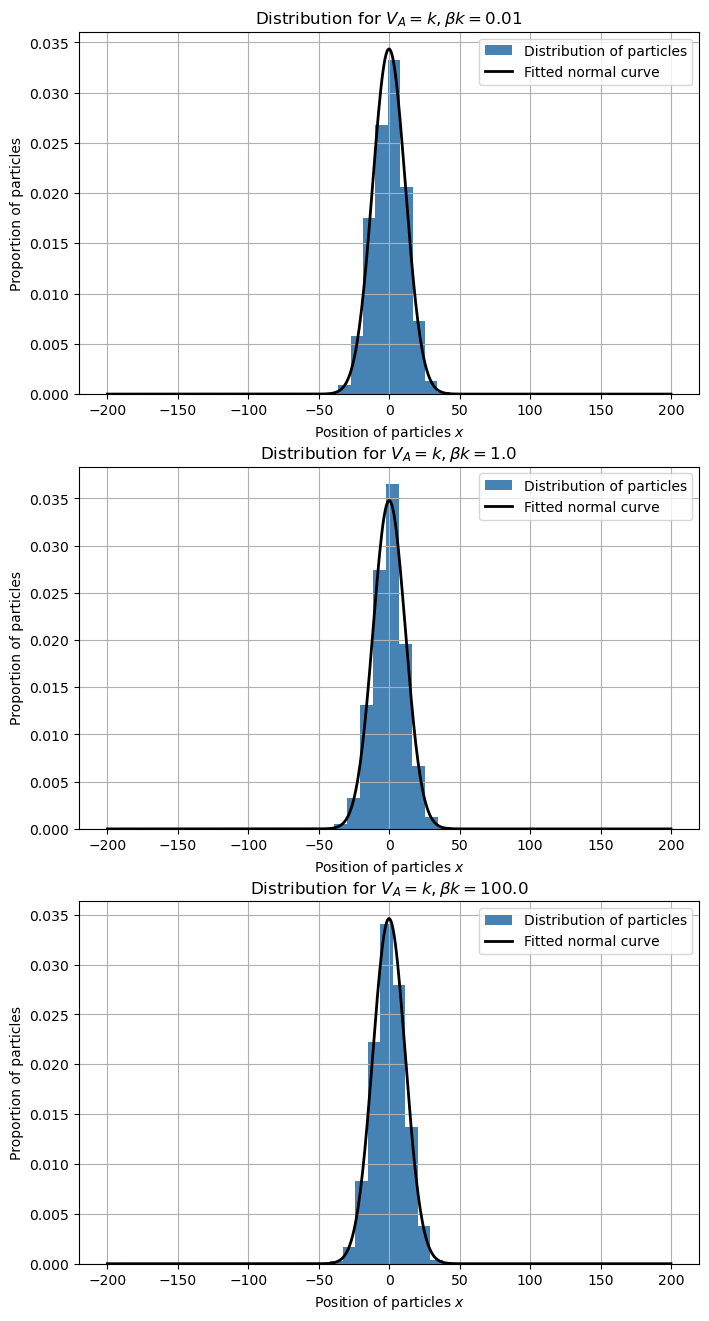

In [3]:
x = np.linspace(-200, 200, 500)     # Plotting range
x_0=np.zeros(N_particles)           # All the particles start in the position x=0


def V_A(k,x):
    """
    Simulates a constant potential, V(x)=k

    INPUT
           k: Float. Arbitrary potential constant. In this case it is set to 1.
           x: N-array. Positions of the N particles.
    OUTPUT
           N-array. Every element is k.

    """
    return np.array([k]*len(x)) # An array [k,k,...,k] with the same length as x

fig, ax_A = plt.subplots(3,1,figsize=(8,16))

for i in range(3):
    # Finding values for plots
    x_A = random_walk_Task2(V_A, β[i], k, N_particles, timesteps, x_0)  # Final positions of particles

    # Fitting normal distribution to x_A, and printing expectation value and standard deviation
    mu, std = norm.fit(x_A)                                             
    p = norm.pdf(x, mu, std)
    print("With βk =",βk[i],"the normal distribution has these properties:")
    print("Expectation value:", mu)
    print("Standard deviation:", std,"\n \n")


    # Plotting histogram and normal distribution
    ax_A[i].hist(x_A, density=True, label='Distribution of particles',color='steelblue')
    ax_A[i].plot(x, p, 'k', linewidth=2, label='Fitted normal curve')
    ax_A[i].set_title(f'Distribution for $V_A=k, βk=${βk[i]}')
    ax_A[i].set_xlabel('Position of particles $x$')
    ax_A[i].set_ylabel('Proportion of particles')
    ax_A[i].legend()
    ax_A[i].grid()

plt.show()

The potential field $V_A$ is uniform. As such, the probability of moving in the positive $x$ direction, the negative $x$ direction, or neither are all equal (see eq. (14)-(16) in task 1c). Thus, the expected value of the final position for the particles is where they started, $x=0$. Moreover, as the probability of $-x$ and $+x$ are equal we expect that the the mean should not diviate much from $x=0$, though it may deviate a little by random chance. The standard deviation, however, depends on the timestep. A higher timestep, e.g. letting the particles take more steps, means more diffusion, and hence, a larger standard deviation. While this was not shown explicitely in these plots, it could be demonstrated by simply increasing the "timestep" variable from 200. 

From the plots we see that changing $\beta k$ appears to have no effect on either the standard deviation or the mean of the normal distribution curve fitted to the data. From task 1c we recall that $p^+$, $p^-$, and $p^0$ depend on the ratio between the potential gradient, $\Delta V$ and temperature, $T\propto 1/\beta$. In an uniform field, we have $|V_A(x+1) - V_A(x)| = 0, \: \forall \, x$, so varying $\beta k$ should not affect the plots, which coincides with our results. 

We would also like to note that the particle distribution in an uniform field seems to resemble a normal distribution.

### **b)**

With βk = 0.01 the normal distribution has these properties:
Expectation value: 1.4317
Standard deviation: 11.79218958082001 
 

With βk = 1.0 the normal distribution has these properties:
Expectation value: 115.1325
Standard deviation: 9.204658806821685 
 



c:\Users\zalav\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1988: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


With βk = 100.0 the normal distribution has these properties:
Expectation value: 200.0
Standard deviation: 0.0 
 



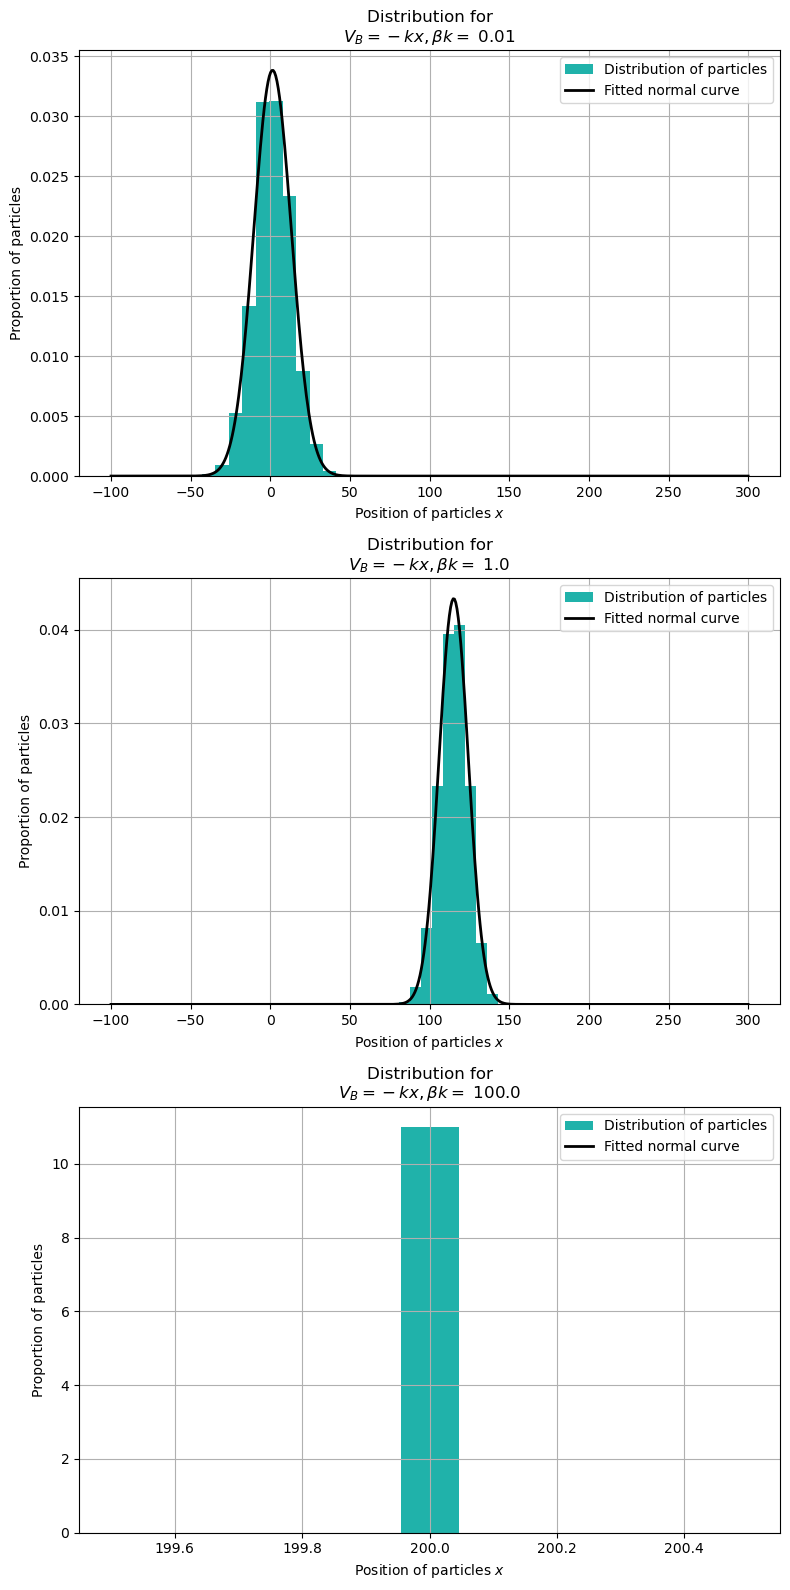

In [4]:
x = np.linspace(-100, 300, 500)     # Plotting range
x_0 = np.zeros(N_particles)         # Starting positions


def V_B(k,x):
    """
    Simulates a linear potential, V(x)=-k*x

    INPUT
           k: Float. Arbitrary proportionality constant. In this case it is set to 1.
           x: N-array. Positions of the N particles.
    OUTPUT
           N-array. Potential felt by all particles in their respective positions.

    """
    return -k*x

fig, ax_B = plt.subplots(3,1,figsize=(8,16))

for i in range(3):
    # Finding values for plots
    x_B=random_walk_Task2(V_B, β[i], k, N_particles, timesteps, x_0)

    # Fitting normal distribution to x_B, and printing expectation value and standard deviation
    mu, std = norm.fit(x_B)
    p = norm.pdf(x, mu, std)
    print("With βk =",βk[i],"the normal distribution has these properties:")
    print("Expectation value:", mu)
    print("Standard deviation:", std,"\n \n")

    # Plotting histogram and normal distribution
    ax_B[i].hist(x_B, density=True, bins=11, label='Distribution of particles',color='lightseagreen')
    ax_B[i].plot(x, p, 'k', linewidth=2, label='Fitted normal curve')
    ax_B[i].set_title(f'Distribution for\n$V_B =- kx, βk=$ {βk[i]}')
    ax_B[i].set_xlabel('Position of particles $x$')
    ax_B[i].set_ylabel('Proportion of particles')
    ax_B[i].legend()
    ax_B[i].grid()

plt.tight_layout()
plt.show()

In this case, the potential has a constant negative gradient, $\Delta V_B(x) = -k$. From the figures, we see that the mean will shift to $+x$ when the tempreature is reduced, e.g. $\beta$ is increased. From task 1c, we recall that the potential gradient was sign-dependent, and since $\Delta V_B < 0$ in this case, it has a "down hill" barrier, leading to $p^-<p^+$ so we expect particles with low kinetic energy to "fall" down and towards $+x$. 

In essence, for sufficiently large $\beta$, $p^- = p^0 = 0$ and $p^+=1$, meaning that taking a step towards $+x$ is much more probable, creating an uniform drift towards $+x$, which can be seen in the trend of the mean in the plots. 

In the first plot, $\beta k=0.01$ and the temperature and thus kinetic energy is so high that $\Delta V_B$ does not affect the particles much. They behave almost as though they were in an uniform field. As the temperature decreases in the second plot, the particles yield a bit more to the potential gradient, "falling" down towards $+x$ and shifting the mean of the normal curve in that direction. Note that the variance seemingly has decreased, also showing the probablity of a step in $+x$-direction is dominant. In the third plot where $\beta k=100$, the particles' thermal energy is so low that they all fully yield to the potential barrier, and the propability for anything but a $+x$-step is negligable. Thus all particles take 200 steps in the positive $x$ direction. As seen in the plot, they are very likely to all end up at the same $x$-coordinate.

### **c)**

With βk = 0.01 the normal distribution has these properties:
Expectation value: 0.0307
Standard deviation: 11.424436857456039 
 

With βk = 1.0 the normal distribution has these properties:
Expectation value: -2.4802
Standard deviation: 6.324318774381949 
 

With βk = 100.0 the normal distribution has these properties:
Expectation value: -0.7698
Standard deviation: 0.4216728115494287 
 



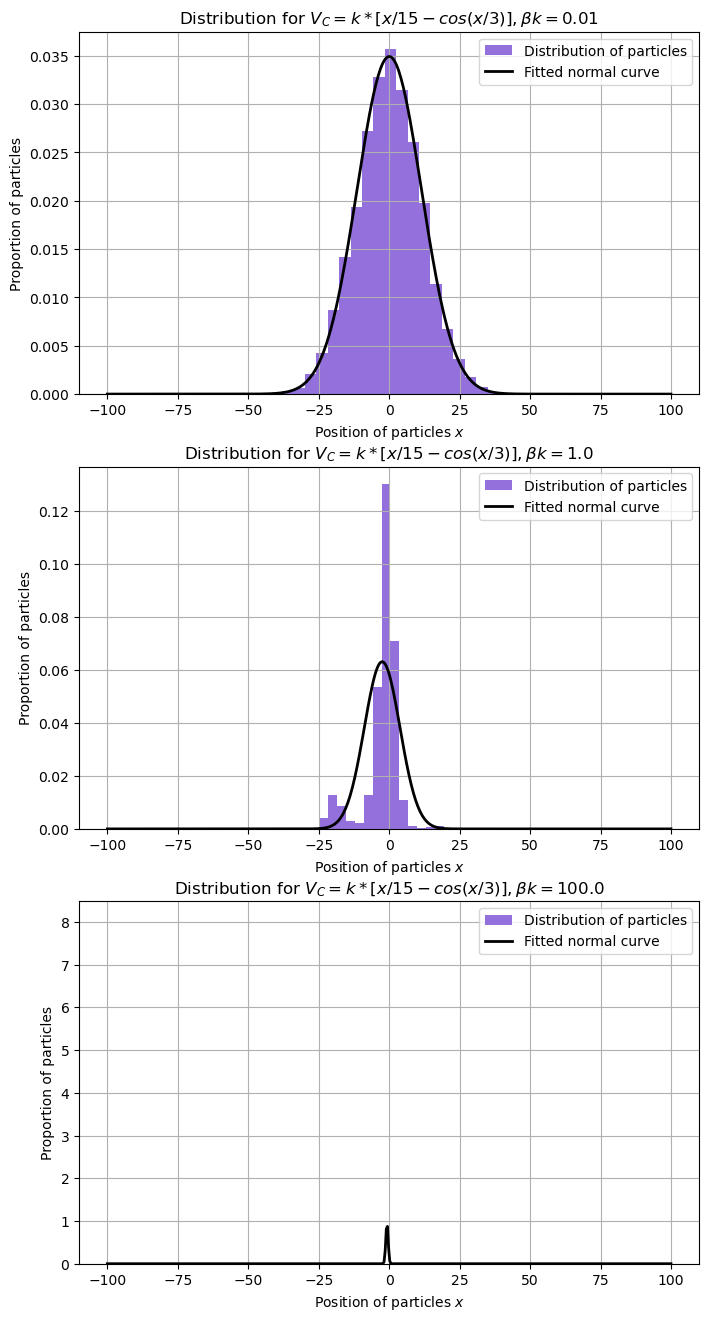

In [5]:
x = np.linspace(-100, 100, 500)   # Plotting range
x_0=np.zeros(N_particles)         # Starting positions

def V_C(k,x):
    """
    Simulates a potential with the properties of both a linear and a trigonometric function.

    INPUT
           k: Float. Arbitrary proportionality constant. In this case it is set to 1.
           x: N-array. Positions of the N particles.         
    OUTPUT
           N-array. Potential felt by all particles in their respective positions.

    """
    return k*(x/15-np.cos(x/3))

fig, ax_C = plt.subplots(3,1,figsize=(8,16))

for i in range(3):
    # Finding values for plots
    x_C=random_walk_Task2(V_C, β[i], k, N_particles, timesteps, x_0)

    # Fitting normal distribution to x_C, and printing expectation value and standard deviation
    mu, std = norm.fit(x_C)
    p = norm.pdf(x, mu, std)
    print("With βk =",βk[i],"the normal distribution has these properties:")
    print("Expectation value:", mu)
    print("Standard deviation:", std,"\n \n")

    # Plotting histogram and normal distribution
    ax_C[i].hist(x_C, density=True, bins=21, label='Distribution of particles',color='mediumpurple')
    ax_C[i].plot(x, p, 'k', linewidth=2, label='Fitted normal curve')
    ax_C[i].set_title(f'Distribution for $V_C=k*[ x/15 - cos(x/3)], βk=${βk[i]}')
    ax_C[i].set_xlabel('Position of particles $x$')
    ax_C[i].set_ylabel('Proportion of particles')
    ax_C[i].legend()
    ax_C[i].grid()

plt.show()

As with prior cases, the first figure with small $\beta k$, and hence large kinetic energy, shows that the particles will behave as if they are subjected to an uniform field. As such, we expect a mean close to their initial positions, $x=0$. This coincides with our results. 

In the second plot, we can no longer ignore the effect of the potential, which has a gradient $\Delta V_C>0$. With this in mind, it is more probable to move towards $-x$. This is seen by our mean shifting to $x\approx -2$. Additionally, $V_C$ has wave properties (see visualization in the plot below), leading to particles with low kinetic energies becoming "trapped" in the troughs. E.g. the troughs of the wave form are local potential minima, making it more likely that particles will settle there. When $\beta k=1$, we see that the histogram has two bumps, a larger one centered at $x=0$ and a smaller one centered at $x \approx -20$. These coordinates coincide with two of the potential's wave troughs. Since the particles' starting position at $x=0$ is a trough itself, most particles will not have the kinetic energy to leave it. Those who do have enough energy, however, will move to the trough to the left of the starting trough because of the potential's positive gradient "pushing" them in the $-x$ direction.

In the third plot, the thermal energy of the particles is so low that they are all very likely to remain in the starting trough. This gives an approximate mean of $x=0$ and a very low standard deviation for the fitted normal distribution.

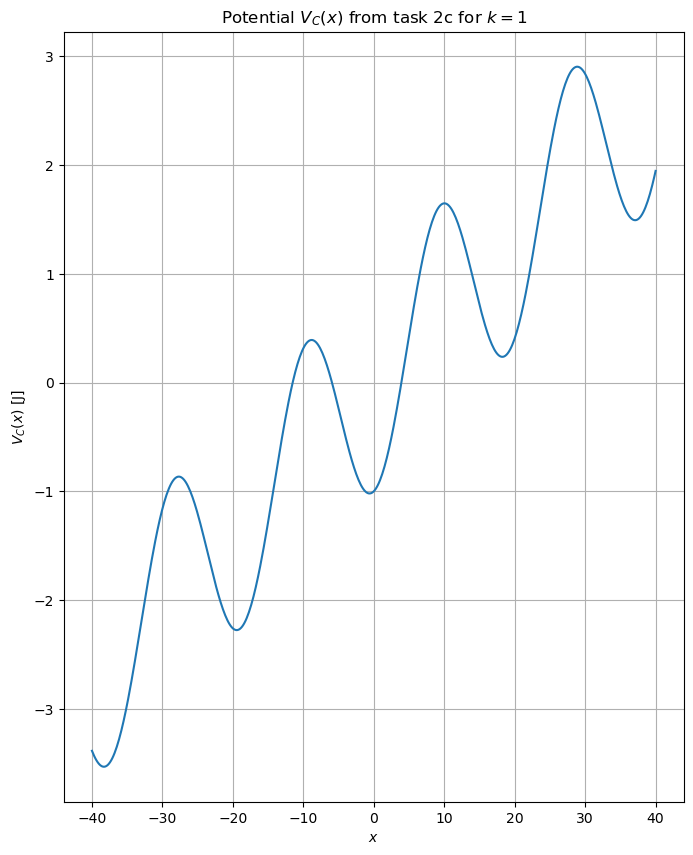

In [6]:
#Plotting a visualization of the function V_C
fig, ax_C3 = plt.subplots(figsize=(8,10))
x=np.linspace(-40,40,500)
ax_C3.plot(x, V_C(k,x))
ax_C3.set_title(f'Potential $V_C(x)$ from task 2c for $k=${k}')
ax_C3.set_ylabel('$V_C(x)$ [J]')
ax_C3.set_xlabel('$x$')
ax_C3.grid()
plt.show()

This is a visual representation of the potential $V_C$. It shows both its wave and linear properties, which are crucial for determining the particles' behaviour.

With βk = 0.01 and 200 timesteps the normal distribution has these properties:
Expectation value: -0.0207
Standard deviation: 11.552768997517434 
 

With βk = 100.0 and 200 additional timesteps the normal distribution has these properties:
Expectation value: -1.4839
Standard deviation: 12.649242696303997 
 



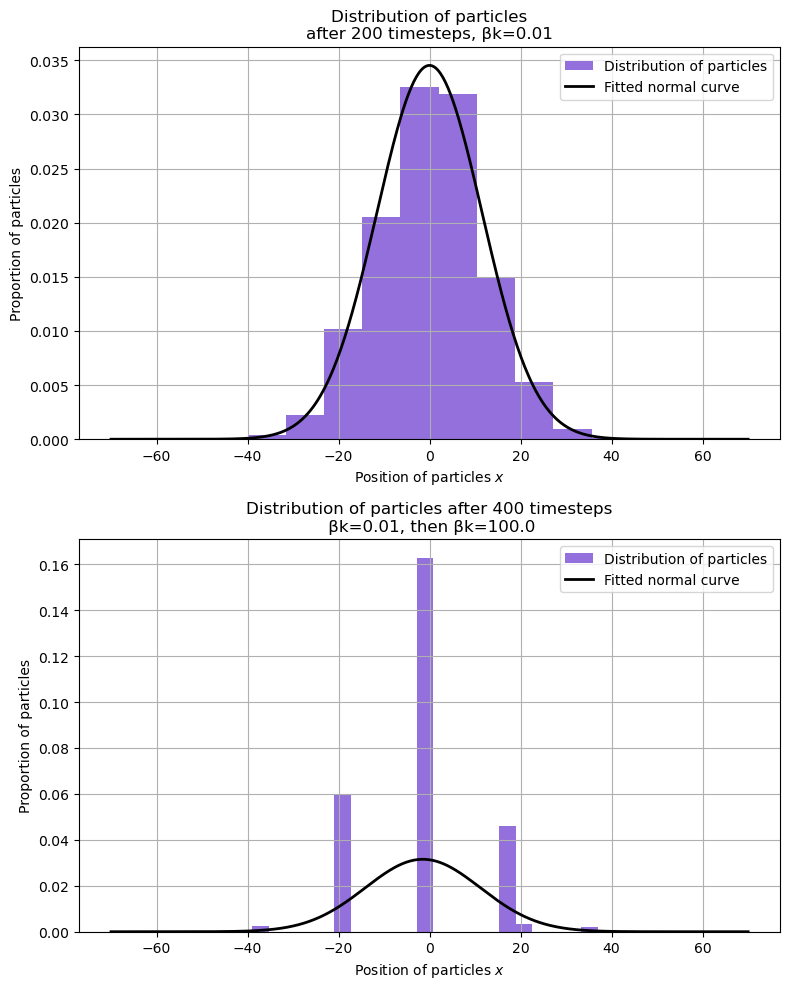

In [7]:
x = np.linspace(-70, 70, 500)     # Plotting range
x_0=np.zeros(N_particles)         # Starting positions

fig, ax_C = plt.subplots(2,1,figsize=(8,10))

# Finding values for plot 1
timesteps=200
x_C1=random_walk_Task2(V_C, β[0], k, N_particles, timesteps, x_0)

# Fitting normal distribution to x_C1, and printing expectation value and standard deviation
mu, std = norm.fit(x_C1)
p = norm.pdf(x, mu, std)
print("With βk =",βk[0],"and 200 timesteps the normal distribution has these properties:")
print("Expectation value:", mu)
print("Standard deviation:", std,"\n \n")

# Plotting histogram and normal distribution
ax_C[0].hist(x_C1, density=True, label='Distribution of particles',color='mediumpurple')
ax_C[0].plot(x, p, 'k', linewidth=2, label='Fitted normal curve')
ax_C[0].set_title(f'Distribution of particles\nafter 200 timesteps, βk={βk[0]}')
ax_C[0].set_xlabel('Position of particles $x$')
ax_C[0].set_ylabel('Proportion of particles')
ax_C[0].legend()
ax_C[0].grid()

# Finding values for plot 2
timesteps=200
x_C2=random_walk_Task2(V_C, β[2], k, N_particles, timesteps, x_C1) #This time, x_C1 are the initial positions

# Fitting normal distribution to x_C2, and printing expectation value and standard deviation
mu, std = norm.fit(x_C2)
p = norm.pdf(x, mu, std)
print("With βk =",βk[2],"and 200 additional timesteps the normal distribution has these properties:")
print("Expectation value:", mu)
print("Standard deviation:", std,"\n \n")

# Plotting histogram and normal distribution
ax_C[1].hist(x_C2, density=True, bins=21, label='Distribution of particles',color='mediumpurple')
ax_C[1].plot(x, p, 'k', linewidth=2, label='Fitted normal curve')
ax_C[1].set_title(f'Distribution of particles after 400 timesteps\n βk={βk[0]}, then βk={βk[2]}')
ax_C[1].set_xlabel('Position of particles $x$')
ax_C[1].set_ylabel('Proportion of particles')
ax_C[1].legend()
ax_C[1].grid()

plt.tight_layout()
plt.show()

In the figures above, we ran the simulation for a timestep of 200, using $\beta k = 0.01$, and then set $\beta k = 100$ to run an additional 200 timesteps. 

As mentioned in the first part of this task, for $\beta k = 0.01$, the potential energy gradient is relatively small comapred to the thermal energy, and hence negligible. The particles behave as if they were in an  uniform potential field. When $\beta k$ then is increased, the particles have already managed to spread out. However, now the thermal energy is low compared to the potential gradient, and the particles will "fall" towards the troughs of the potential, as we see in the second plot.

### **d)**

With βk = 0.01 the normal distribution has these properties:
Expectation value: 0.0104
Standard deviation: 1.5583619091854113 
 

With βk = 1.0 the normal distribution has these properties:
Expectation value: -0.0027
Standard deviation: 0.6065415979139436 
 

With βk = 100.0 the normal distribution has these properties:
Expectation value: 0.0
Standard deviation: 0.0 
 



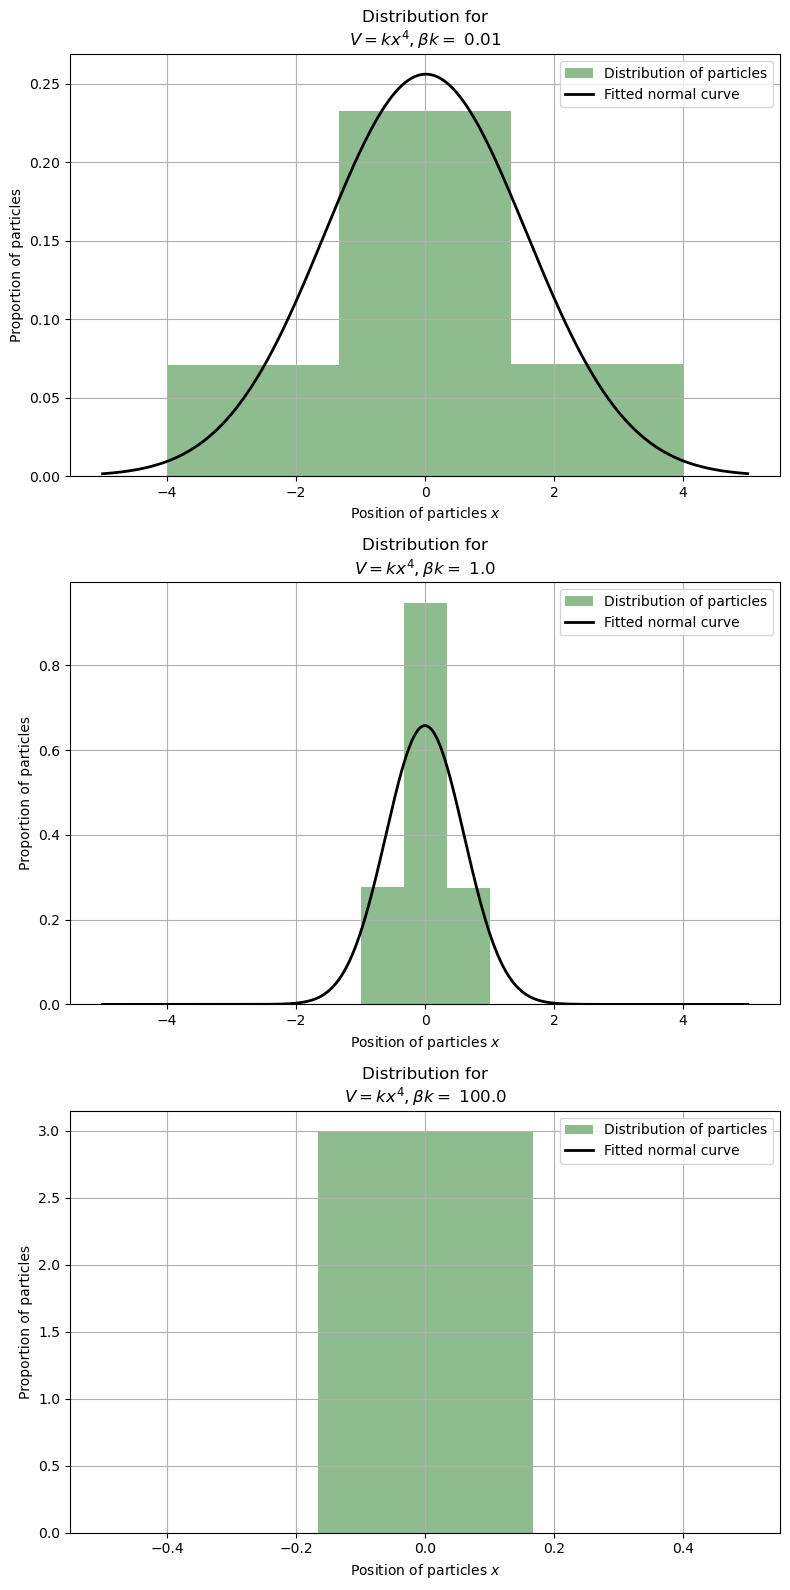

In [8]:
x = np.linspace(-5, 5, 500)         # Plotting range
x_0 = np.zeros(N_particles)         # Starting positions
timesteps=200

def V_D(k,x):
    """
    Simulates the potential V(x)=k*x^4

    INPUT
           k: Float. Arbitrary proportionality constant. In this case it is set to 1.
           x: N-array. Positions of the N particles.         
    OUTPUT
           N-array. Potential felt by all particles in their respective positions.

    """
    return k*x**4
        

fig, ax_D = plt.subplots(3,1,figsize=(8,16))
for i in range(3):
    # Finding values for plots
    x_D=random_walk_Task2(V_D, β[i], k, N_particles, timesteps, x_0)

    # Fitting normal distribution to x_C2, and printing expectation value and standard deviation
    mu, std = norm.fit(x_D)
    p = norm.pdf(x, mu, std)
    print("With βk =",βk[i],"the normal distribution has these properties:")
    print("Expectation value:", mu)
    print("Standard deviation:", std,"\n \n")

    # Plotting histogram and normal distribution
    ax_D[i].hist(x_D, density=True, bins=3, label='Distribution of particles',color='darkseagreen') # There can be max 3 bins in this histogram because
                                                                                                    # the particles in bk=1 have only 3 possible positions: {-1,0,1}
    
    ax_D[i].plot(x, p, 'k', linewidth=2, label='Fitted normal curve')
    ax_D[i].set_title(f'Distribution for\n$V=kx^4, βk=$ {βk[i]}')
    ax_D[i].set_xlabel('Position of particles $x$')
    ax_D[i].set_ylabel('Proportion of particles')
    ax_D[i].legend()
    ax_D[i].grid()
    
plt.tight_layout()
plt.show()

$\beta k$ alone can not be used as a ratio to determine whether the thermal energy or potential energy will dominate the random walk for $V_D(x) = kx^4$. That is because $\Delta V_D$ is constantly increasing with increasing $x$ creating a shape that looks like an infinitely deep well. This means that for whichever value of $\beta k$ we chose, we can always find some value $x$ where the potential is so large that it will completely block the particles from going any further.

This is also visible in the plots, where, regardless of $\beta k$, all the particle distributions are centered at $x \approx 0$ and the standard deviation is very small, though larger with increased temperature. The particles are essentially "trapped" at the bottom of the infinite potential well.

### **Task 3**

In [28]:
#Redefining the probabilities- and random walk-function to better accomodate calculations in task 3

# Defining new variables, and re-defining old ones for exercise 3
α = 0.1                                 # Float between 0 and 1. Used to calculate the ratchet potential.
Tp = 200                                # Timesteps for (de-)excitement, excitement-period = 2*Tp = 1 cycle
Nx = 100                                # [length] size of one cycle / spatial period /sawtooth
βk = 1000                               # Relation for thermal and potential energy 
β = βk / k
k=1
Np = 3                                  # Number of particles in system
timesteps = 30000  
x_0 = np.zeros(Np)                      # Starting positions

def probabilities_Task3(V, β, k, α, Nx, positions, h=h):   
    '''
    Calculates the probabilities for going left, right and neither. 
    INPUT
        V:          N-array. Potential that the particles are put into. 
        β, k, α:    Constants, defined above
        Nx:         Period of the ratchet potential.
        positions:  N-array. Position of all N particles. 
        h:          Int. Stepsize
    OUTPUT
        Scalars.
        p_plus:     Float. Probability of each particle taking one step to the right.
        p_0:        Float. Probability of each particle stayng put.
        p_minus:    Float. Probability of each particle taking one step to the left.

    '''
    p_plus = 1 / ( 1 + 
                  np.exp( -β * ( V(k, α, Nx, positions - h) - V(k, α, Nx, positions + h))) + 
                  np.exp( -β * ( V(k, α, Nx, positions) - V(k, α, Nx, positions + h))))
    p0 = 1 / ( 1 + 
              np.exp( -β * ( V(k, α, Nx, positions - h) - V(k, α, Nx, positions))) + 
              np.exp( -β * ( V(k, α, Nx, positions + h) - V(k, α, Nx, positions))))
    p_minus = 1 / ( 1 + 
                   np.exp( -β * ( V(k, α, Nx, positions) - V(k, α, Nx, positions - h))) + 
                   np.exp( -β * ( V(k, α, Nx, positions + h) - V(k, α, Nx, positions - h))))

    return p_plus, p0, p_minus


def random_walk_Task3(V, β, k, α, N, timesteps, Nx, x_0, h=h):
    '''
    Simulates a random walk with "timesteps" steps for N particles by 
    assigning each particle a number between 0 and 1. Together with the 
    probabilities calculated in the function above, we move the particle left, right or 
    neither depending on the following conditions:
    
           left:       if ≤ pMinus
           right:      if ≥ 1-pPlus
           neither:    otherwise
    INPUT
        V:              n-array. Potential. The probabilities depend on this
        β, k, α:        Constants specified above.
        N:              Int. The number of particles.
        timesteps:      Int. Number of times the simulation is run.
        Nx:             Period of the ratchet potential.
        x_0:            N-array. Initial positions of the particles.
        h:              Int. Stepsize

    OUTPUT
        positions:    N-array. The final positions of the particles.
        nRight_nLeft: n-array. The first column contains the number of particles taking one step to 
                        the right for every timestep. The second column contains the number of 
                        particles taking one step to the left for every timestep.
    '''
    positions =   x_0.copy()        # Set the initial position for the particles
    nRight_nLeft=np.zeros([timesteps, 2])

    for i in range(timesteps):
        rand_numbers = np.random.rand(N)
        p_plus, p0, p_minus = probabilities_Task3(V, β, k, α, Nx, positions)

        # The conditions that are mentioned above
        left_array = np.where( rand_numbers <= p_minus)[0] 
        right_array = np.where( rand_numbers >= (1-p_plus) )[0]
        
        # Moves the particles if the conditions are meet
        positions[left_array] -= h
        positions[right_array] += h

        # Counts the number of particles that step forwards/backwards at one timestep
        nRight_nLeft[i,0]=len(right_array)
        nRight_nLeft[i,1]=len(left_array)

    return positions, nRight_nLeft


### **a)**

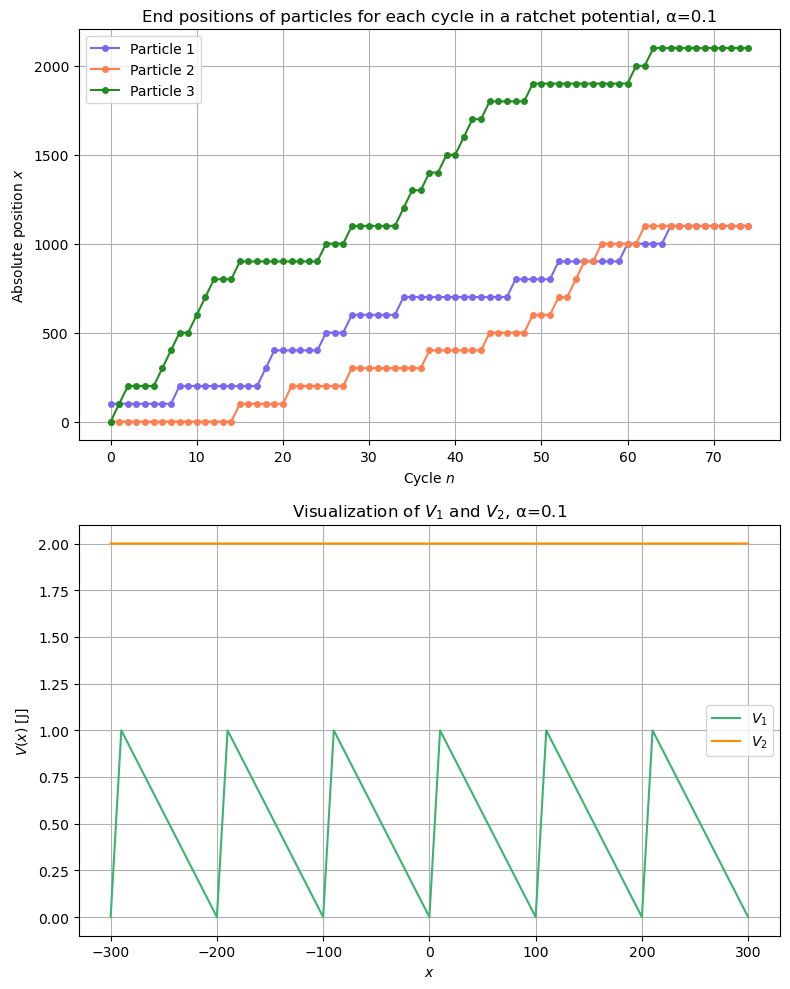

In [29]:
def V1(k, α, Nx, x):
    '''
    Models the sawtooth potential as described in the exercise.
    INPUT
        x:          n-array. Position space for all sawtooths
        Nx:         Period of the ratchet potential.
    OUTPUT
        V_arr:      n-array. Sawtooth potential         
    '''
    mock_x = x.copy()                                                   # Deep copy to avoid changing x itself
    V_arr = np.zeros(len(mock_x))
    mock_x = mock_x % Nx                                                # All x-values will now be in [-Nx, Nx]
    mock_x = np.where(mock_x < 0, mock_x + Nx, mock_x)                  # Add one period to the negative x-values
    V1_1 = k * mock_x / ( α * Nx)                                       # Define potential with positive slope
    V1_2 = -k * (mock_x - Nx) / ((1 - α)*  Nx)                          # Define potential with negative slope 
                                                                        # (shifted one period to the right, therefore x_mock-Nx)
    V_arr=np.where((0 <= mock_x) & (mock_x < α * Nx), V1_1, V1_2)       # Where 0<=x<alpha*Nx, V will be equal to V_1, 
                                                                        # and when the condition is not satisfyed, it will be equal to V2.
    return V_arr

def V2(k, α, Nx, x):
    return np.array([2*k]*len(x))           # Arbitrarily chosen constant V2


def random_ratchet(V1, V2, β, k, α, Np, Tp, timesteps, x_0, Nx=Nx, h=h):
    '''
    Simulates a random walk in a retchet potential for Np number of particles for 
    a set number of exitation/de-excitation cycles.

    INPUT
        V1:             Sawtooth potential
        V2:             Uniform field
    OUTPUT
        end_positions:  n-array. Contains the final position for each particle.
                        There Np, for each particle position. 
        J_avg:          n-array. Average current for every cycle.
                        Calculated as by the project description. First used in task 3b.
    '''
    positions = x_0.copy()
    cycles = int( timesteps // (2 * Tp))
    J_avg = np.zeros(cycles)
    end_positions = np.zeros([cycles, Np])

    for i in range(cycles):
        # (de-)excite the particles to V1 or V2.
        positions, nRight_nLeft_1 = random_walk_Task3(V2, β, k, α, Np, Tp, Nx, positions)
        positions, nRight_nLeft_2 = random_walk_Task3(V1, β, k, α, Np, Tp, Nx, positions)
        nRight_nLeft = np.r_[nRight_nLeft_1, nRight_nLeft_2]
        # Calculating the normalized particle current J from project document
        J = (nRight_nLeft[:,0] - nRight_nLeft[:,1]) / Np                
        J_avg[i] = np.mean(J)
        
        end_positions[i]= positions.copy()

    return end_positions, J_avg

ratchet_walk, unused_in_3a =random_ratchet(V1, V2, β, k, α, Np, Tp, timesteps, x_0)
#Making (n,3)-array into 3 n-arrays
particle1=ratchet_walk[:,0]
particle2=ratchet_walk[:,1]
particle3=ratchet_walk[:,2]
cycle_arr=np.arange(0,len(particle1))

#Plottig the absolute positions of the three particles
fig, ax_3a = plt.subplots(2,1,figsize=(8,10))
ax_3a[0].plot(cycle_arr,particle1, "-o", markersize=4, color="mediumslateblue", label="Particle 1")
ax_3a[0].plot(cycle_arr,particle2, "-o", markersize=4, color="coral", label="Particle 2")
ax_3a[0].plot(cycle_arr,particle3, "-o", markersize=4, color="forestgreen", label="Particle 3")
ax_3a[0].set_title('End positions of particles for each cycle in a ratchet potential, α=0.1')
ax_3a[0].set_xlabel('Cycle $n$')
ax_3a[0].set_ylabel('Absolute position $x$')
ax_3a[0].legend()
ax_3a[0].grid()

#Plotting visualization of V1 and V2
x_plotV=np.linspace(-300,300,10000)
ax_3a[1].plot(x_plotV,V1(k, α, Nx, x_plotV),color='mediumseagreen',label='$V_1$')
ax_3a[1].plot(x_plotV,V2(k, α, Nx, x_plotV),color='darkorange',label='$V_2$')
ax_3a[1].set_title('Visualization of $V_1$ and $V_2$, α=0.1')
ax_3a[1].set_xlabel('$x$')
ax_3a[1].set_ylabel('$V(x)$ [J]')
ax_3a[1].legend()
ax_3a[1].grid()

fig.tight_layout()
plt.show()

The first graph displays the absolute positions of the particles after each cycle. It shows that the particles have a net movement in the positive $x$ direction. It is also observed that the particles are very likely to either move towards $+x$ or remain in the same position after a cycle, but are never observed to go towards $-x$.

To interpretate this physically, we consider the particles as balls, and the potentials $V_1$ and $V_2$ as platforms (visualized in the second plot). $\beta k=1000$ and $k=1$ which results in a very large $\beta$, meaning that the partcles have a very low kinetic energy. Therefore, when performing random walk on a potential-slope, they will have a strong tendency to move towards the lower potential, as a ball would roll to the bottom of the grooves in $V_1$. Though this gives an intuitive understanding of how potentials affect the random walk of the particles, it is important to note that the particles only experience the potentials, they do not actually rest physically on them. 

When the particles are excited, they are "lifted" from platform $V_1$ to $V_2$, keeping their x-coordinate unchanged momentarily. The initial condition has all the particles start in $x = 0$. 

Starting in the uniform potential $V_2$, the particles will behave similarly to how they did in exercise 2a. They will perform a random walk in one dimension, each possible move being equally likely, ending up with a distribution that can be approximated as a normal distribution. After $T_p=200$ steps they are returned to $V_1$. Here, we imagine that the "balls" roll to the bottom of the grooves. When $\alpha<0.5$ (as is the case here), the slopes with a negative gradient cover the bigger portion of the $x$-axis, and thus a larger portion of the balls returning from $V_2$ would fall on it and roll in the positive $x$ direction to the bottom of the groove. The smaller portion of balls landing on the slopes with a positive gradient, however, will roll in the negative $x$-direction and into the grooves. We assume that the slopes are so steep, and the steps are small and many enough, that by the end of the cycle, all the balls will be located close to the bottom of the grooves. 

When the next cycle commences and the balls are once again lifted to $V_2$, they will again spread normally from the groove-coordinates. To clarify, this means that the particles are now spread out between the $x$-values $x_{min}$=$\{-l \cdot N_x,-(l-1)N_x, ..., (m-1)N_x, m \cdot N_x\}$ for positive integers $l, m$, and spread outward into normal distributions in all of these locations simultaneously. Now, the road to cross a sawtooth-peak and move into an adjacent groove is much shorter for a particle moving in the positive $x$-direction, than opposite. For $\alpha = 0.1$, a ball would have to have moved an absolute distance of $90$ steps in the $-x$ direction to move one groove left, while only an absolute distance of $10$ steps in the $+x$-direction is required to move one groove right. Thus, the balls moving left or standing still are most likely to go back to the same groove when put back into $V_1$, and those moving right are more likely to move to the next groove. 

In the biological setting of this overall project, this could describe how the movement of proteins like myosin walking along the filament, is driven by potential differences and random walk. One can relate the simulated random walk on a ratchet potential to figure 1 in the project description. The particles in this task represent the many myosin heads located on the thick filaments in our muscles. ATP attaching itself to a myosin head and putting it into an energized configuration (step 3 in fig. 1) corresponds to the particles being transferred from $V_1$ to $V_2$ before each new cycle. The myosin head fastening itself to the thin filament and drawing itself back into a non-energized configuration (steps 4->1->2) corresponds to the particles being lowered down into the $V_1$-potential and falling to the bottom of the grooves, to the minimal energy state. Our simulation shows that this results in a current, which explains how the thick filaments in our muscles are able to extend and contract when we need them to. The random walk of the myosin heads drags them in the desired direction.

### **b)**

The cycle-averaged currents when α = 0.8 for  10  cycles are as follows:
[-0.0291225  -0.0139075  -0.01250583 -0.0122525  -0.01133083 -0.0127525
 -0.013825   -0.01250833 -0.0122475  -0.01224667] 
 

The cycle-averaged currents for  10  cycles when α = 0.1 are as follows:
[0.0394375  0.02583083 0.02975    0.0271675  0.02708    0.0279175
 0.02800333 0.02541417 0.028085   0.026085  ] 
 



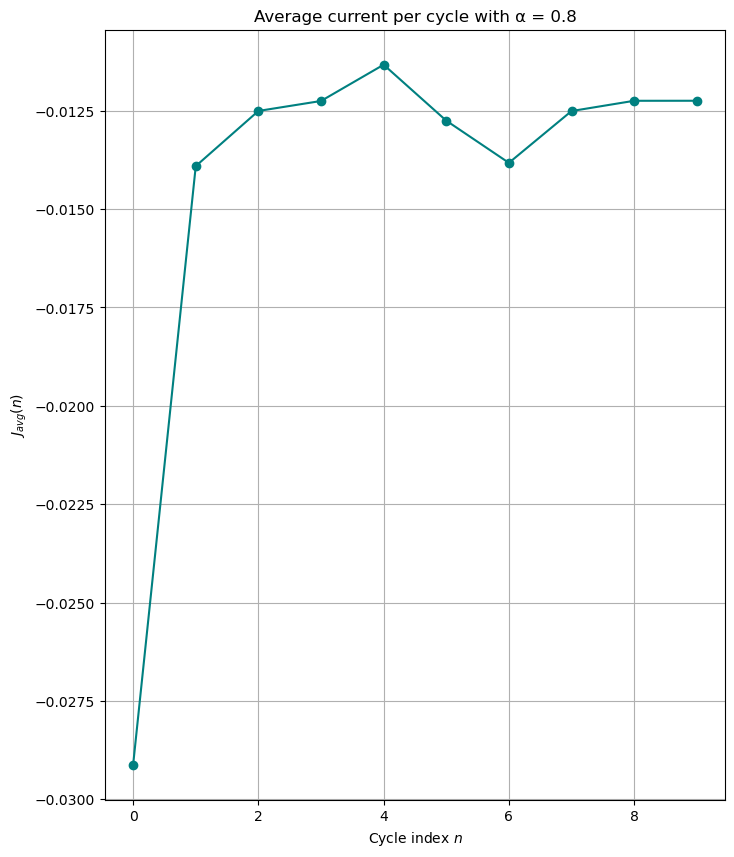

In [11]:
#Defining quantities
Tp=500
Nx=100
Np=12*Nx
cycles=10
timesteps=2*cycles*Tp

#Defining starting positions
upper=α*Nx+(1-α)*Nx
lower=-(1-α)*Nx-α*Nx
x_0=np.linspace(lower,upper,int(Np/6))
x_0=np.repeat(x_0,6)

#Calculating J_avg(n) for n={0,1,2,3,4,5,6,7,8,9} and alpha=0.8
α=0.8
positions, J_avg_alpha08=ratchet_walk, unused = random_ratchet(V1, V2, β, k, α, Np, Tp, timesteps, x_0)
print("The cycle-averaged currents when α = 0.8 for ", cycles, " cycles are as follows:")
print(J_avg_alpha08,"\n \n")

#Plotting J_avg(n) calculated above
fig, ax_3b = plt.subplots(figsize=(8,10))
ax_3b.plot(np.linspace(0,cycles-1,cycles),J_avg_alpha08, "-o", color="teal")
ax_3b.set_title("Average current per cycle with α = 0.8")
ax_3b.set_xlabel("Cycle index $n$")
ax_3b.set_ylabel("$J_{avg}(n)$")
ax_3b.grid()

#Calculating J_avg(n) for n={0,1,2,3,4,5,6,7,8,9} and alpha=0.1
α=0.1
positions, J_avg_alpha01=ratchet_walk, unused = random_ratchet(V1, V2, β, k, α, Np, Tp, timesteps, x_0)
print("The cycle-averaged currents for ", cycles, " cycles when α = 0.1 are as follows:")
print(J_avg_alpha01,"\n \n")

plt.show()


The graph shows the average particle current per cycle, with $\alpha = 0.8$.

As seen in task 3a, the current is non-zero because of the asymmetric sawtooth potential. Notice that here $α = 0.8$, thus the sawtooth potential will have a positive slope covering most of the values on the $x$-axis, which yields a negative current. Whereby, $\alpha=0.1$, will render the figure in task 3a, which, as we have already explained, yields a positive current because it has negative slopes covering most of the $x$-axis. In essence, the particles will be excited to $V_2$ where they then diffuse. Therafter, yhey will de-excite to $V_1$, where they will either fall to the minimum that they initially occupied, or the one to left or right for $\alpha = 0.8$ or $α = 0.1$, respectively. 

From the simulation, it appears that $|J(0)| > |J(n)|$ for $n > 0$, but $J(1) \approx J(2 ) \approx ... \approx J(10)$. This may be explained by the way that the particles are initially distributed in $V_2$. The starting position array $x_0$ is set so that the $x$-coordinates the particles start from are very close together. Our chosen $x_0$ is completely independent of how $V_1$ looks like. Cycle $0$ begins and the particles distribute themselves across the $x$-axis as they please during $T_p$ timesteps before they are de-excited to $V_1$. As we have seen, when the particles enter the $V_1$-potential they will fall into the minima located at $x_{min}$=$\{-l \cdot N_x,-(l-1)N_x, ..., (m-1)N_x, m \cdot N_x\}$ so that when they are re-excited to $V_2$ to undergo cycle $1$, the particles will have initial positions centred at these minima. After another $T_p$ timesteps in $V_2$, the particle distribution will look like a "normal distribution train" (like $\delta$-train, but with normal distributions) with the expectation value $\mu$ located at the minima, $x_{min}$, and some variance $\sigma^2$. Then they are de-excited to $V_1$ again and fall towards the minimas again, either the one they were in the previous cycle or into a new one.

This normal distribution train will now appear in every future cycle, because the particles will always tend towards $x_{min}$. We will never see the distribution they had in cycle $0$ ever again, because they will never again be located at the $x_0$-positions. This must be what is causing $|J(0)| > |J(n)|$ for $n > 0$. To see why that is, we must look at where particles start versus where they might end up.

From now on we will use a $V_1$-potential where $\alpha=0.1$ to visualize a particle's wanderings (see second plot in task 3a). Let us say that a particle starts at the minima in $x=0$. It is first excited to $V_2$, wanders around under the influence of that potential, and is then de-excited to $V_1$. Assuming that $T_p$ is small enough, the particle only has three possible end positions: $x=-100$, $x=0$, or $x=100$. Because the probability of its end position in $V_2$ is normally distributed and because of the purposeful shape of the $V_1$-potential, the most likely outcome is that the particle will end up where it started. This would not contribute anything to the average current. The second most likely outcome is that it ends up at $x=100$ and has thereby moved $100$ steps ahead. This is the only option that contributes to a positive current. The least likely, though still very possible, outcome is that it goes $100$ steps towards $-x$. That would dampen or cancel out the positive current. For every cycle $n>0$ with sufficiently small $T_p$, these would be the only options for each particle, resulting in a weakly positive current.

Let us now say that we have a particle starting in $x=20$ and put it under the same conditions as the first particle. After spending $T_p$ timesteps in $V_2$ and getting de-excited to $V_1$ to spend $T_p$ timesteps there, its chances of ending up where it started are close to zero. The particle's possible positions after a cycle are $x=0$, $x=100$ and $x=200$. Because its end position in $V_2$ is also normally distributed and $V_1$ still has a sawtooth shape, the most likely outcome is that it moves $80$ steps ahead and lands in $x=100$. That would contribute to a positive current. The second most likely outcome is that it $20$ steps behind in $x=0$. This would contribute to a negative current, though it is a much smaller contribution than moving $80$ steps ahead. The least likely outcome is that i lands in $x=200$ which would also contribute to a positive current.

If one takes a third particle starting in $x=5$ and goes through a similar procedure, one finds that the most likely outcome is that it ends up $5$ steps behind, in $x=0$, which is a contribution to a negative current. Though it is also quite likely to end up $95$ steps ahead in $x=100$, which would be a large contribution to a positive current.

In conclusion, particles that start at an $x$-coordinate where $V_1$ has a negative slope (like the second particle in our example) are most likely to contribute to a positive current, then particles starting at $x_{min}$, and lastly particles starting at an $x$-coordinate where $V_1$ has a positive slope. When we gave the particles the $x_0$ starting positions, they were uniformly distributed across all of these points, though the majority had their starting positions at the negative slopes because they take up most of the $x$-axis. After this first cycle, it was only possible for particles to have starting positions at $x_{min}$. From this one can draw the conclusion that the particles had starting positions that were "beneficial" for a larger current in cycle $0$, but beacuse of $V_1$'s shape, they would not get such advantageous positions again. This can be applied to systems of any $\alpha$, finally explaining why we see that $\lvert J(0) \rvert > \lvert J(n) \rvert$.

### **c)**

C:\Users\zalav\AppData\Local\Temp\ipykernel_22088\448501749.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_avg=float(J_avg)    # J_avg is a n-array with one element. Changing data type to float


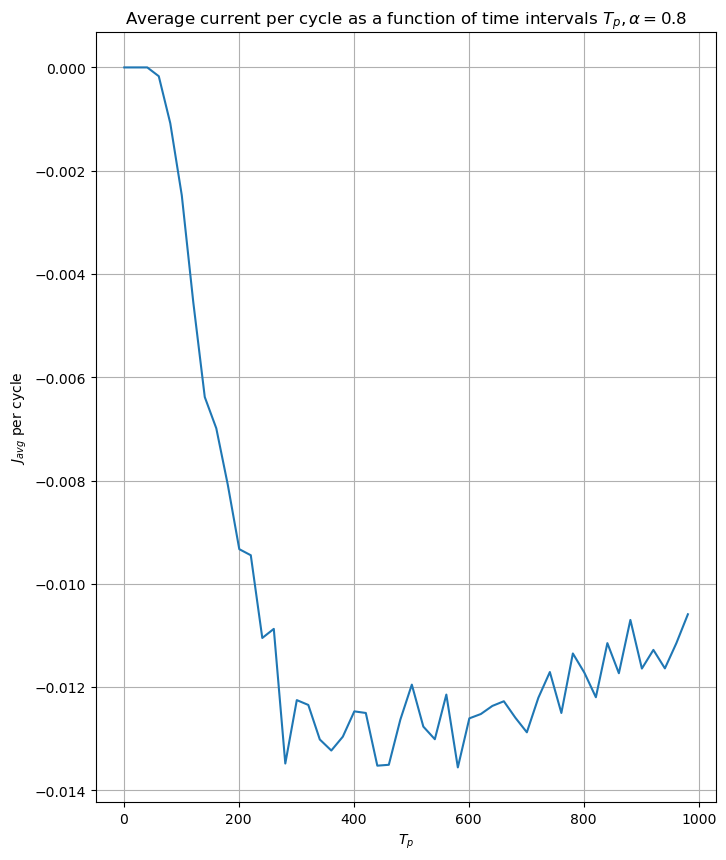

In [30]:
#Defining constants and quantities
Nx=100
Np=40*Nx
α=0.8
x_0=np.array([-Nx,0]) #All particles start in either 0 or -Nx
x_0=np.repeat(x_0,int(Np/2)) #Make these two positions repeat until there are Np positions


def J_avg_with_diff_Tp(V1, V2, β, k, α, Np, x_0, Tp_min, Tp_max, size_of_array, Nx):
    '''
    Calculates the average current per cycle for different Tp-values. 
    Uses the function random_ratchet to do this.

    INPUT
         Tp_min:        Int. Lower boundary of the different Tp-values.
         Tp_max:        Int. Upper boundary of the different Tp-values
         size_of_array: Int. Number of different Tp-values we run the simulation for.

    OUTPUT
         Tp_equallySpaced: n-array. Array of different Tp-values of length "size_of_array"
         J_avg_array:      n-array. Average current for one cycle calculated from each Tp-value 
                           in the array Tp_equallySpaces

    '''
    Tp_equallySpaced=np.arange(Tp_min,Tp_max,(Tp_max-Tp_min)//size_of_array)
    J_avg_array=np.zeros(size_of_array)
    for i in range(size_of_array):
        # timesteps is set to 2*Tp_equallySpaced[i] = 1 cycle with Tp number i:
        positions, J_avg=random_ratchet(V1, V2, β, k, α, Np, Tp_equallySpaced[i], 2*Tp_equallySpaced[i], x_0, Nx)
        J_avg=float(J_avg)    # J_avg is a n-array with one element. Changing data type to float
        J_avg_array[i]=J_avg  
    return Tp_equallySpaced, J_avg_array

#Tp_min=1, Tp_max=1001, size_of_array=50:
Tp_equallySpaced, J_avg_array=J_avg_with_diff_Tp(V1, V2, β, k, α, Np, x_0, 1, 1001, 50, Nx)

#Plotting J-avg(Tp)
fig, ax_3c = plt.subplots(figsize=(8,10))

ax_3c.plot(Tp_equallySpaced,J_avg_array)
ax_3c.set_title('Average current per cycle as a function of time intervals $T_p, α = 0.8$')
ax_3c.set_xlabel('$T_p$')
ax_3c.set_ylabel('$J_{avg}$ per cycle')
ax_3c.grid()
plt.show()

The figure shows a plot of the average particle current density, $J_{avg}$, as a function of the amount of time, $T_p$, that the particles spend in each potential. As $\alpha=0.8$ for this case, we get negative currents consistent with our explanation in task 3b.

We see from the plot that $\lvert J_{avg} \rvert$ increases relatively rapidly in the interval $20 < T_p < 300$ before flattening out in the interval $300<T_p<700$ and seemingly decreasing a little in the interval $700<T_p<1000$. In the interval $0<T_p<20$, the average current is essentially zero beacuse with the parameters we have set, a particle would have to walk at least net 20 steps in $-x$-direction before being able to leave its starting groove. Such a small cycle duration would therefore confine them to one $x$-coordinate and hence not allow a current.

The rapid increase of $\lvert J_{avg} \rvert$ in the interval $20 < T_p < 300$ could be explained by the fact that a higher $T_p$ increases the probability of the particles spreading out more (e.g. the normal distributions get an increased variance) when they are in $V_2$ and gives more particles the chance to wander into the next groove. As explained in task 3a and 3b, this moves particles along the $x$-axis and presents as a current. As $T_p>300$ however, the large variance is no longer an "advantage" for the current. It is true that particles wandering far away from the $x_{min}$-coordinate they started at increases the probability of them going into a new groove in the desired direction (for $\alpha =0.8$ that is to the left), but it simultaneously increases the probability of them going into a new groove in the opposite direction. That is why $\lvert J_{avg} \rvert$ stagnates and eventually slightly decreases with higher $T_p$-values. We can observe from graph that the shape of the sawtooth-wave potential induces a current in a certain direction even for very large $T_p$, but if one desires $\lvert J_{avg} \rvert$ to be as large as possible, one should choose a $T_p$-value approximately between $300$ and $700$.

### **d)**

C:\Users\zalav\AppData\Local\Temp\ipykernel_22088\1685246086.py:14: RuntimeWarning: divide by zero encountered in divide
  V1_1 = k * mock_x / ( α * Nx)                                       # Define potential with positive slope
C:\Users\zalav\AppData\Local\Temp\ipykernel_22088\1685246086.py:14: RuntimeWarning: invalid value encountered in divide
  V1_1 = k * mock_x / ( α * Nx)                                       # Define potential with positive slope
C:\Users\zalav\AppData\Local\Temp\ipykernel_22088\2252683328.py:31: RuntimeWarning: overflow encountered in exp
  np.exp( -β * ( V(k, α, Nx, positions - h) - V(k, α, Nx, positions + h))) +
C:\Users\zalav\AppData\Local\Temp\ipykernel_22088\2252683328.py:32: RuntimeWarning: overflow encountered in exp
  np.exp( -β * ( V(k, α, Nx, positions) - V(k, α, Nx, positions + h))))
C:\Users\zalav\AppData\Local\Temp\ipykernel_22088\2252683328.py:34: RuntimeWarning: overflow encountered in exp
  np.exp( -β * ( V(k, α, Nx, positions - h) - V(k, α, Nx

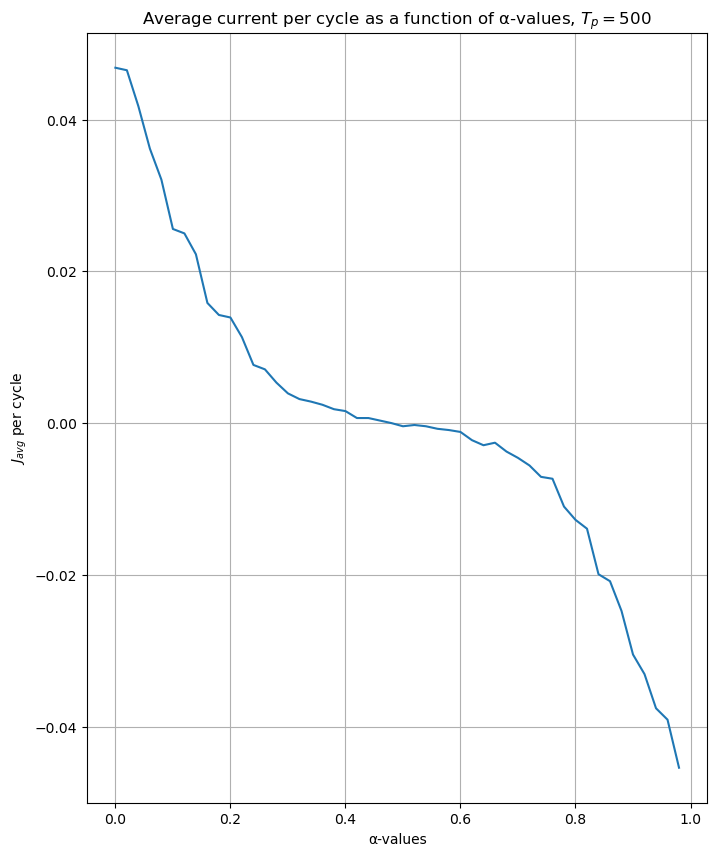

In [31]:
#Defining quantities
Nx=100
Tp=500
Np=12*Nx
x_0=np.array([-Nx,0])        #All particles start in either 0 or -Nx
x_0=np.repeat(x_0,int(Np/2)) #Make these two positions repeat until there are Np positions

def J_avg_with_diff_alpha(V1, V2, β, k, Np, Tp, x_0, size_of_array, Nx):
    '''
    Calculates the average current per cycle for different α-values. 
    Uses the function random_ratchet to do this.

    INPUT
         size_of_array: Int. Size of the array with equally spaced α-values.

    OUTPUT
         alpha_equallySpaced: n-array. Array of different Tp-values of length "size_of_array"
         J_avg_array:         n-array. Average current for one cycle calculated from each α-value 
                              in the array alpha_equallySpaces

    '''
    alpha_equallySpaced=np.arange(0,1,1/size_of_array)
    J_avg_array=np.zeros(size_of_array)
    for i in range(size_of_array):
        # timesteps is set to 2*Tp = 1 cycle:
        positions, J_avg=random_ratchet(V1, V2, β, k, alpha_equallySpaced[i], Np, Tp, 2*Tp, x_0, Nx)
        J_avg=float(J_avg) # J_avg is a n-array with one element. Changing data type to float
        J_avg_array[i]=J_avg
    return alpha_equallySpaced, J_avg_array

#size_of_array=50:
alpha_equallySpaced, J_avg_array=J_avg_with_diff_alpha(V1, V2, β, k, Np, Tp, x_0, 50, Nx)

#Plotting  J_avg(alpha)
fig, ax_3d = plt.subplots(figsize=(8,10))

ax_3d.plot(alpha_equallySpaced,J_avg_array)
ax_3d.set_title('Average current per cycle as a function of α-values, $T_p = 500$')
ax_3d.set_xlabel('α-values')
ax_3d.set_ylabel('$J_{avg}$ per cycle')
ax_3d.grid()
plt.show()

The graph shows average current of the first cycle with different $\alpha$ values. 

This plot coincides with what we have already observed and explained in task 3. $0<\alpha<0.5$ creates a sawtooth wave with negative slopes covering most of the values on the $x$-axis, making most of the particles either "roll" down the adjacent groove towards $+x$, or roll back down the same groove where they started in the negative $x$-direction. This gives a net current in the positive $x$-direction. The exact same explanation holds for $0.5<\alpha<1$, only that all the directions and signs in the explanation above are the opposite, inducing a net current towards $-x$.

### **Task 4**

### **a)**

C:\Users\zalav\AppData\Local\Temp\ipykernel_22088\1685246086.py:14: RuntimeWarning: divide by zero encountered in divide
  V1_1 = k * mock_x / ( α * Nx)                                       # Define potential with positive slope
C:\Users\zalav\AppData\Local\Temp\ipykernel_22088\1685246086.py:14: RuntimeWarning: invalid value encountered in divide
  V1_1 = k * mock_x / ( α * Nx)                                       # Define potential with positive slope
C:\Users\zalav\AppData\Local\Temp\ipykernel_22088\2252683328.py:31: RuntimeWarning: overflow encountered in exp
  np.exp( -β * ( V(k, α, Nx, positions - h) - V(k, α, Nx, positions + h))) +
C:\Users\zalav\AppData\Local\Temp\ipykernel_22088\2252683328.py:32: RuntimeWarning: overflow encountered in exp
  np.exp( -β * ( V(k, α, Nx, positions) - V(k, α, Nx, positions + h))))
C:\Users\zalav\AppData\Local\Temp\ipykernel_22088\2252683328.py:34: RuntimeWarning: overflow encountered in exp
  np.exp( -β * ( V(k, α, Nx, positions - h) - V(k, α, Nx

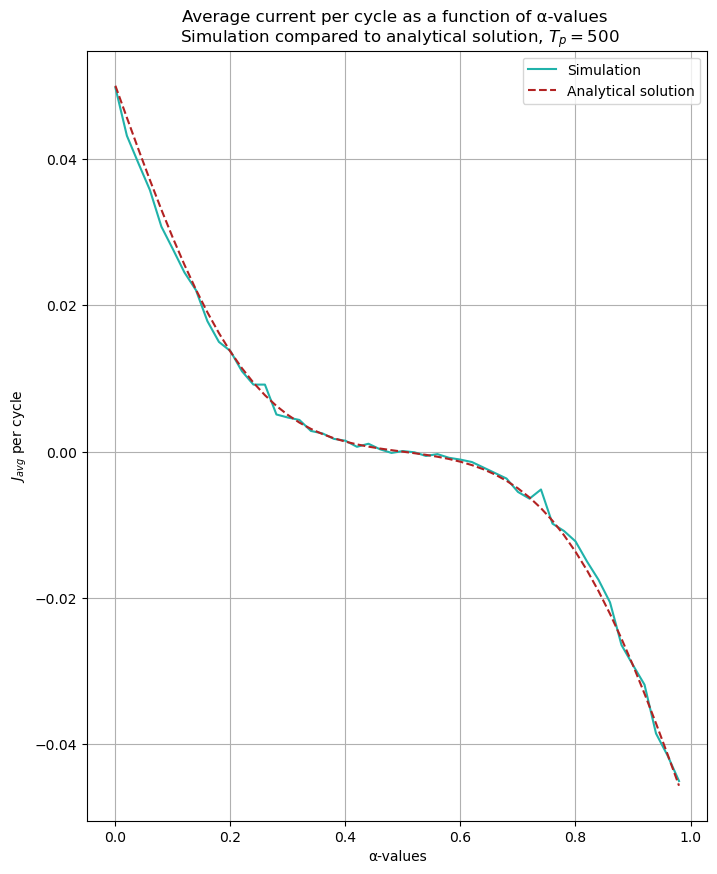

In [23]:
Tp=500
Nx=100
Np=12*Nx
x_0=np.array([-Nx,0])        #All particles start in either 0 or -Nx
x_0=np.repeat(x_0,int(Np/2)) #Make these two positions repeat until there are Np positions

def analytical_solution(α, Tp, Nx):
    '''
    Returns eq. (15) in the project description, e.g. the analytical solution
    '''
    erfc_expression1=special.erfc((α*Nx/2)*np.sqrt(3/Tp))
    erfc_expression2=special.erfc(((1-α)*Nx/2)*np.sqrt(3/Tp))
    return (Nx/(4*Tp))*(erfc_expression1-erfc_expression2)



alpha_equallySpaced, J_avg_array=J_avg_with_diff_alpha(V1, V2, β, k, Np, Tp, x_0, 50, Nx)
analyical_J_avg = analytical_solution(alpha_equallySpaced, Tp, Nx)

#Plotting simulated and analytical solution  
fig, ax_4a = plt.subplots(figsize=(8,10))

ax_4a.plot(alpha_equallySpaced, J_avg_array, color='lightseagreen',label='Simulation')
ax_4a.plot(alpha_equallySpaced, analyical_J_avg, linestyle="--", color='firebrick', label='Analytical solution')
ax_4a.set_title('Average current per cycle as a function of α-values \n Simulation compared to analytical solution, $T_p=500$')
ax_4a.set_xlabel('α-values')
ax_4a.set_ylabel('$J_{avg}$ per cycle')
ax_4a.grid()
ax_4a.legend()
plt.show()

The graph shows average particle current of the first cycle, given different values for $\alpha$. The analytical solution is plotted in red dashed lines, to be compared with the simulated values from 3d) represented as a teal line. 

From this plot we can see that the analytical solution seems to agree well with the simulation. The analytical solution accurately predicts how large the averge current per cycle will be for sawtooth potentials with different, $\alpha$-dependent slopes. However, in task 4c we will see that this is not the case for lower $\beta$ values.

### **b)**

C:\Users\zalav\AppData\Local\Temp\ipykernel_22088\2252683328.py:38: RuntimeWarning: overflow encountered in exp
  np.exp( -β * ( V(k, α, Nx, positions + h) - V(k, α, Nx, positions - h))))
C:\Users\zalav\AppData\Local\Temp\ipykernel_22088\3189947336.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_avg=float(J_avg)    # J_avg is a n-array with one element. Changing data type to float


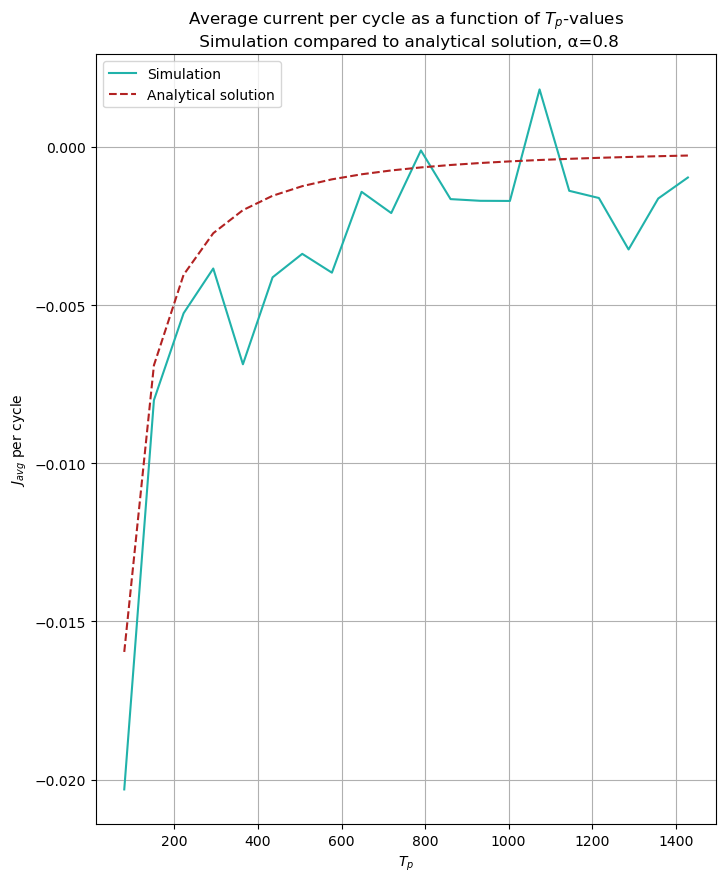

In [15]:
β = 1000
k = 1
Nx=10
Np=12*Nx
x_0=np.array([-Nx,0]) 
x_0=np.repeat(x_0,int(Np/2)) #Make these two positions repeat until there are Np positions
α=0.8

#T_min=80, T_max=1500, size_of_array=20:
Tp_equallySpaced, J_avg_array=J_avg_with_diff_Tp(V1, V2, β, k, α, Np, x_0, 80, 1500, 20, Nx)
analyical_J_avg = analytical_solution(α, Tp_equallySpaced, Nx)

#Plotting comparison between analytical solution and simulation
fig, ax_4b = plt.subplots(figsize=(8,10))

ax_4b.plot(Tp_equallySpaced, J_avg_array, color='lightseagreen',label='Simulation')
ax_4b.plot(Tp_equallySpaced, analyical_J_avg, linestyle="--", color='firebrick', label='Analytical solution')
ax_4b.set_title('Average current per cycle as a function of $T_p$-values \n Simulation compared to analytical solution, α=0.8')
ax_4b.set_xlabel('$T_p$')
ax_4b.set_ylabel('$J_{avg}$ per cycle')
ax_4b.grid()
ax_4b.legend()
plt.show()

From this plot we can see that the analytical solution and the simulation agree fairly well. The high variation for the simulated values is likely caused by an $N_x$ that is very small relative to the $T_p$-values. Since the number of particles is proportional to $N_x$, this also contributes to the variation. Had $N_x$ been increased, it would reduced the random diversions in the teal-coloured graph. 

The analytical solution for $J_{avg}$ is inversely proportional to $T_p$ and thus approaches $0$ when $T_p\to\infty$. This also seems to be the case for the simulated values. As explained in task 3c, the average current per cycle decreases when $T_p$ becomes very large because an exeptionally high $T_p$-value allows the particles to spread out more when they are influenced by the $V_2$-potential. When $T_p\to\infty$, the particles create a completely uniform distribution, akin to a flat lake surface. When they have infinite time to move around, some particles can move very far in the $-x$-direction, while others can move very far in the $+x$-direction. When they then get transferred to $V_1$ they have wandered so far in both directions that the particle current almost cancels out. However, i doesn't entirely cancel out because the shape of the sawtooth wave "encourages" a certain direction (depending on $\alpha$), still causing a small current. A large $T_p$ does not influence the random walk in $V_1$ much, as the particles do not have the kinetic energy to wander far from the bottom of the groove they landed in.

### **c)**

C:\Users\zalav\AppData\Local\Temp\ipykernel_22088\1685246086.py:14: RuntimeWarning: divide by zero encountered in divide
  V1_1 = k * mock_x / ( α * Nx)                                       # Define potential with positive slope
C:\Users\zalav\AppData\Local\Temp\ipykernel_22088\1685246086.py:14: RuntimeWarning: invalid value encountered in divide
  V1_1 = k * mock_x / ( α * Nx)                                       # Define potential with positive slope
C:\Users\zalav\AppData\Local\Temp\ipykernel_22088\1095694448.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_avg=float(J_avg) # J_avg is a n-array with one element. Changing data type to float


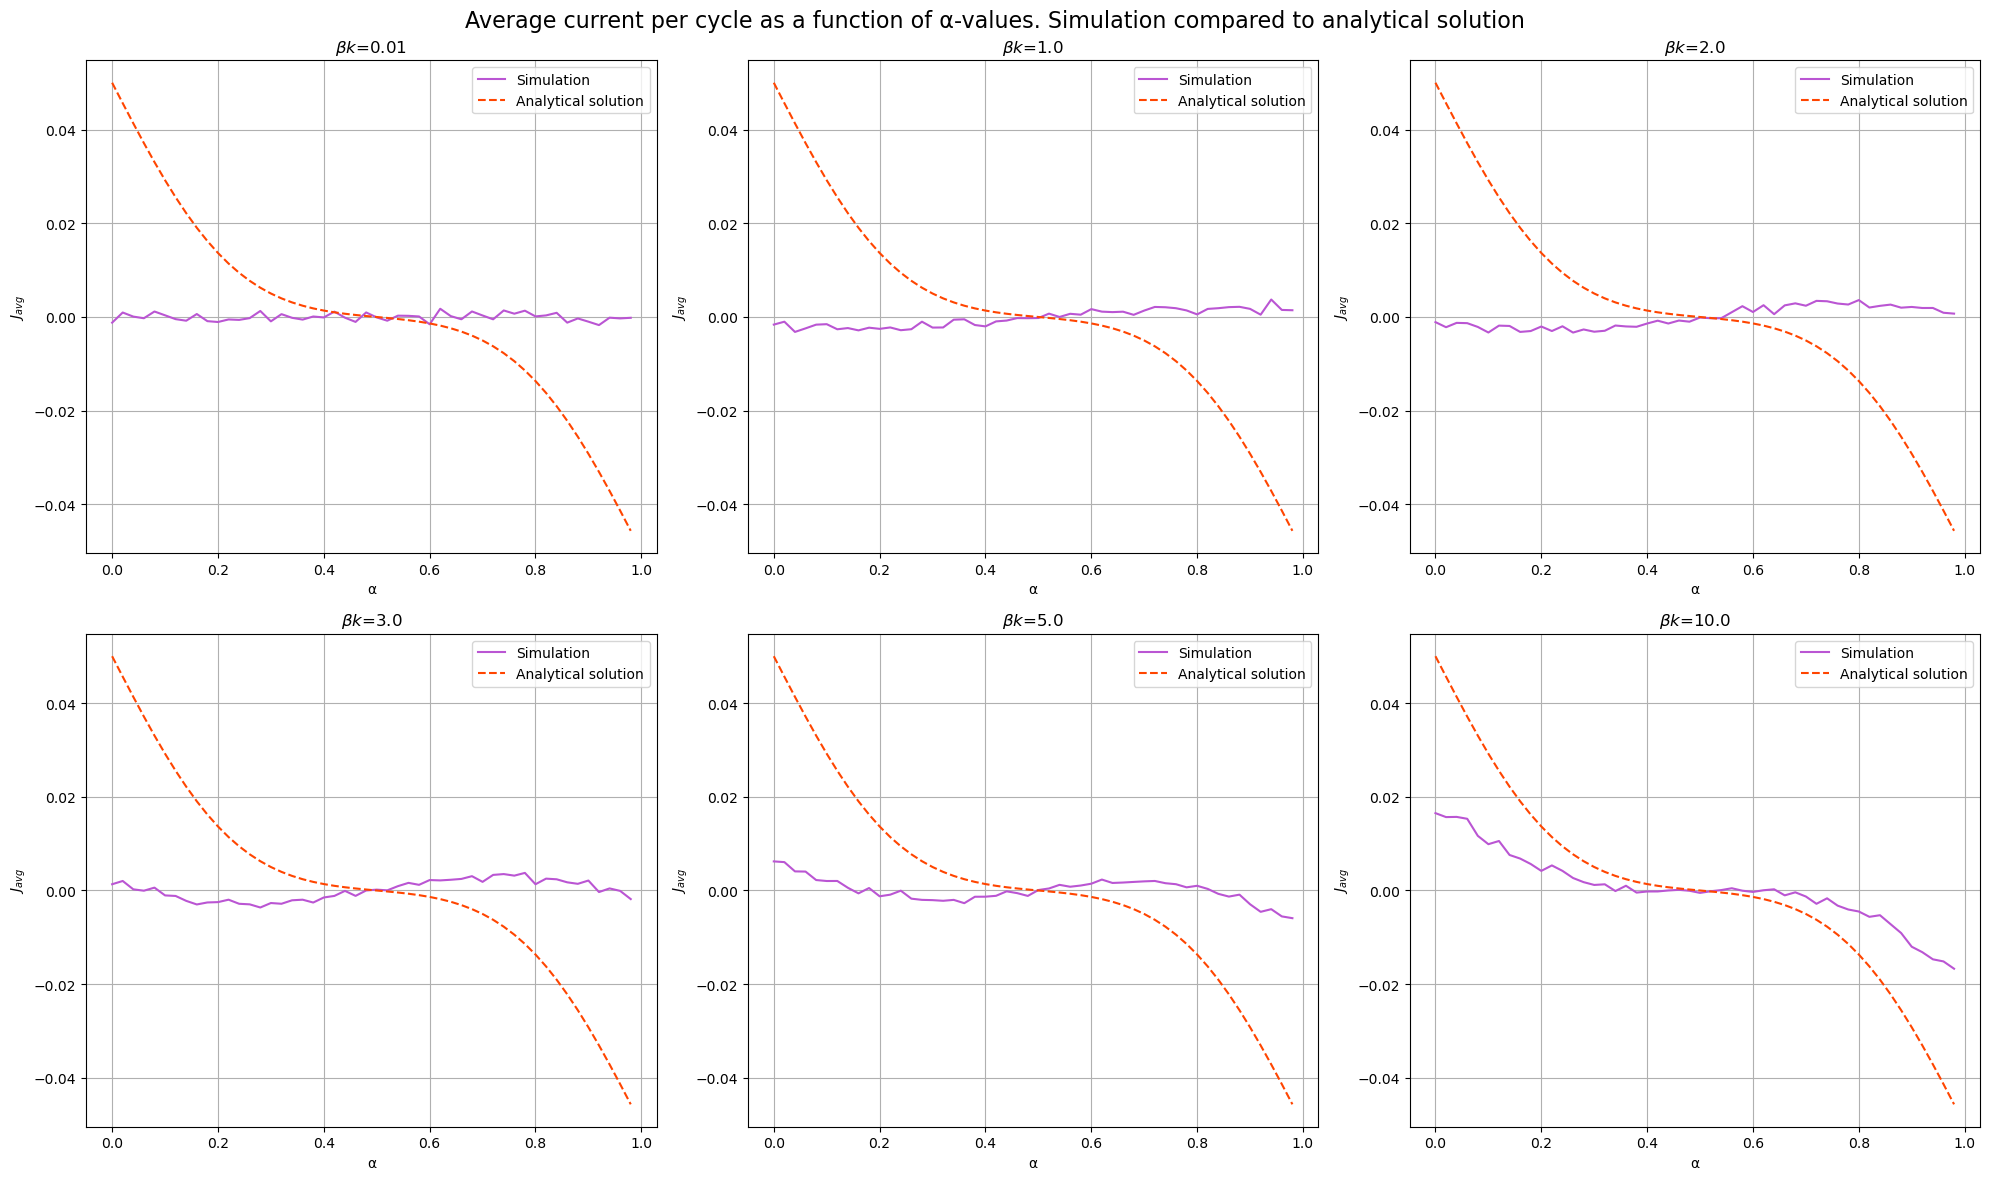

In [26]:
Tp=500
Nx=100
Np=12*Nx
βk=np.array([0.01,1,2,3,5,10])            # Relation for thermal and potential energy 
k=1                                       # Potential strength 
β=βk/k  

#Plotting graphs for βk={0.01,1,2,3,5,10}
fig, ax_4c = plt.subplots(2,3,figsize=(20,12))

plt.suptitle('Average current per cycle as a function of α-values. Simulation compared to analytical solution', fontsize=16)

for i in range(3):
    alpha_equallySpaced, J_avg_array=J_avg_with_diff_alpha(V1, V2, β[i], k, Np, Tp, x_0, 50, Nx)
    analyical_J_avg = analytical_solution(alpha_equallySpaced, Tp, Nx)
    
    ax_4c[0,i].plot(alpha_equallySpaced, J_avg_array, color='mediumorchid',label='Simulation')
    ax_4c[0,i].plot(alpha_equallySpaced, analyical_J_avg, linestyle="--", color='orangered', label='Analytical solution')
    ax_4c[0,i].set_title(f'$βk$={βk[i]}')
    ax_4c[0,i].set_xlabel('α')
    ax_4c[0,i].set_ylabel('$J_{avg}$')
    ax_4c[0,i].grid()
    ax_4c[0,i].legend()

    alpha_equallySpaced, J_avg_array=J_avg_with_diff_alpha(V1, V2, β[i+3], k, Np, Tp, x_0, 50, Nx)
    analyical_J_avg = analytical_solution(alpha_equallySpaced, Tp, Nx)

    ax_4c[1,i].plot(alpha_equallySpaced, J_avg_array, color='mediumorchid',label='Simulation')
    ax_4c[1,i].plot(alpha_equallySpaced, analyical_J_avg, linestyle="--", color='orangered', label='Analytical solution')
    ax_4c[1,i].set_title(f'$βk$={βk[i+3]}')
    ax_4c[1,i].set_xlabel('α')
    ax_4c[1,i].set_ylabel('$J_{avg}$')
    ax_4c[1,i].grid()
    ax_4c[1,i].legend()
        
plt.tight_layout()
plt.show()


### **d)**
From the plots in 4a and 4c, we see that the analytical solution fits better for larger values of $\beta k$, and that the analytical solution appears to be independent of $\beta k$. It thus appears that the model assumes higher $\beta k$. In other words, the thermal energy must be small relative to the potential for the analytical solution to work.

In the analytical solution, we assume that the diffusion coefficient, $D$, is constant. That is, $D=1/3$ since $D\propto d$ and $d=2/3$ for a uniform potential. This leads to the assumption that diffusion only happens in the uniform potential, $V_2$ and not the sawtooth potential $V_1$. Yet, in 2c, we see that even if $V_C$ is not uniform, the particles will diffuse normally at higher temperatues (small $\beta k$, first figure), and fall into the groves at lower temperatues (large $\beta k$, second figure). Likewise, the analytical solution does not take into account diffusion in the sawtooth potential, which happens at sufficiently high temperatues, and therefore, only works at the lower temperature limit. 

An alternative approach to this assumption is that $d$, which is related to the probability, $p^i$, is constant. From task 1c, we may reacall that the $p^i$ depends on $\beta \Delta V$, and hence, depends on $\beta k$. In conclusion, $D$ depends on $\beta k$, which the analytical solution does not account for.

Another effect of this, we see when plotting for $N_x=1000$ in 4b. While the analytic solution stays around zero for the whole domain, the numerical solution seems to have a vertical asymptote for smaller values of $T_p$ (that is, for small time intervals in each potential), before also going towards zero for larger $T_p$. For $\alpha=0.8$, the current seems to be positive, and negative for $\alpha=0.1$! This means the current is going in the opposite direction from what we have usually seen from these $\alpha$-values. Our hypothesis is as follows: Lets assume $\alpha=0.8$. The particles start with medium high kinetic energy compared to the potential ($\beta k=1000$). After having spread out for a small time interval in $V_2$, they land in $V_1$. Approximately the same number of particles land on the steep slope to the left of the minima they started in as on the gentle slope to the right of the same minima (the gentle slopes are almost flat, due to the large period). The time interval is not long enough for the particles to get beyond neither the right nor left sawtooth peak. Since the particles have medium high energy, the particles at the gentle slope will be less affected by the slope, and do not contribute to any significant current. The particles at the steep slope, however, will slide down to the bottom, and thus contribute to a current in the opposite direction from what is expected with that $\alpha$-value. For higher values of $T_p$, we get more and more particles at the gentle slopes, and this will make the current smaller, although not zero, since there are still particles on the steep slopes. Plotting for higher $\beta k$-values (e.g. $\beta k=10000$) we see this effect disappearing, since the kinetic energy becomes so low that even the particles on the gentle slopes will slide down to the bottom and the current will be cancelled out. Again, this shows how the analytical solution does not take $\beta k$ into account.

We also tried setting $N_x=1000$ in 4a. However there the analytical solution agreed well with the numerical solution, which shows that the analytical solution takes care of the value of $\alpha$ even for longer periods (as we also see in equation 15 in the project description).